In [1]:
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import pandas_ta
import warnings
warnings.filterwarnings("ignore")

sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

In [2]:
sp500

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [3]:
sp500['Symbol'] = sp500['Symbol'].str.replace('.', '_')
sp500['Symbol'].unique().tolist()

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMTM',
 'AEE',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BAX',
 'BDX',
 'BRK_B',
 'BBY',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF_B',
 'BLDR',
 'BG',
 'BXP',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CAG',
 'COP',
 'ED',

In [4]:
symbols_list = sp500['Symbol'].unique().tolist()
end_date = '2023-09-27'
start_date = pd.to_datetime(end_date)-pd.DateOffset(365*8) 

In [5]:
start_date

Timestamp('2015-09-29 00:00:00')

In [6]:
df = yf.download(tickers=symbols_list,
                start = start_date,
                end=end_date)
df

[*********************100%***********************]  502 of 503 completed

104 Failed downloads:
['GEV', 'AMTM', 'SOLV']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2015-09-29 00:00:00 -> 2023-09-27) (Yahoo error = "Data doesn\'t exist for startDate = 1443499200, endDate = 1695787200")')
[*********************100%***********************]  502 of 503 completed['EA', 'CPT', 'FMC', 'COR', 'CCL', 'WAB', 'CI', 'FFIV', 'COP', 'KIM', 'AOS', 'BF_B', 'ICE', 'LIN', 'AMGN', 'BWA', 'STX', 'LMT', 'CL', 'COO', 'GDDY', 'MCO', 'CNP', 'VLTO', 'CCI', 'LYB', 'PSA', 'ODFL', 'AMP', 'TXT', 'ROL', 'ARE', 'REGN', 'EQT', 'SBUX', 'FSLR', 'ORLY', 'PFE', 'AJG', 'BA', 'UNP', 'AWK', 'WELL', 'MLM', 'UAL', 'CMG', 'MDLZ', 'GPN', 'QRVO', 'TROW', 'BMY', 'APA', 'STZ']: ReadTimeout(ReadTimeoutError("HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Read timed out. (read timeout=10)"))
['NVR']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\

Price                       Adj Close                                      \
Ticker                              A        AAPL        ABBV        ABNB   
Date                                                                        
2015-09-29 00:00:00+00:00   31.375292   24.595572   35.718925         NaN   
2015-09-30 00:00:00+00:00   31.923939   24.875223   36.815056         NaN   
2015-10-01 00:00:00+00:00   31.375292   24.712845   37.302212         NaN   
2015-10-02 00:00:00+00:00   32.240097   24.893265   37.769089         NaN   
2015-10-05 00:00:00+00:00   32.863152   24.983477   38.350983         NaN   
...                               ...         ...         ...         ...   
2023-09-20 00:00:00+00:00  111.487709  174.404694  146.724167  138.009995   
2023-09-21 00:00:00+00:00  108.771652  172.854324  146.552231  132.750000   
2023-09-22 00:00:00+00:00  110.436974  173.709000  145.893173  132.199997   
2023-09-25 00:00:00+00:00  110.962349  174.991043  147.717529  134.139999   
2023-09-26 00:00:00+00:00  109.762909  170.896545  147.010727  132.279999   

Price                                                                    \
Ticker                           ABT       ACGL         ACN        ADBE   
Date                                                                      
2015-09-29 00:00:00+00:00  33.145821  23.217773   82.766998   79.830002   
2015-09-30 00:00:00+00:00  33.749992  23.287504   84.189293   82.220001   
2015-10-01 00:00:00+00:00  34.203117  23.262148   84.343521   83.750000   
2015-10-02 00:00:00+00:00  34.723385  23.563267   85.157478   83.989998   
2015-10-05 00:00:00+00:00  34.731777  23.766125   87.068146   85.839996   
...                              ...        ...         ...         ...   
2023-09-20 00:00:00+00:00  97.776695  77.327065  310.500061  535.780029   
2023-09-21 00:00:00+00:00  96.460396  76.347641  305.795563  513.880005   
2023-09-22 00:00:00+00:00  95.699875  76.984741  309.804230  512.900024   
2023-09-25 00:00:00+00:00  95.036850  77.165421  310.686340  511.600006   
2023-09-26 00:00:00+00:00  93.827797  77.270020  304.433167  506.299988   

Price                                             ...  Volume           \
Ticker                            ADI        ADM  ...     WTW       WY   
Date                                              ...                    
2015-09-29 00:00:00+00:00   44.792744  31.394039  ...  345752  3053000   
2015-09-30 00:00:00+00:00   46.748554  31.723133  ...  649262  2837500   
2015-10-01 00:00:00+00:00   45.530315  31.730778  ...  527632  3270800   
2015-10-02 00:00:00+00:00   46.151859  32.465515  ...  367458  2846400   
2015-10-05 00:00:00+00:00   47.593857  33.399223  ...  179275  3286600   
...                               ...        ...  ...     ...      ...   
2023-09-20 00:00:00+00:00  172.330887  76.143326  ...  670700  2374200   
2023-09-21 00:00:00+00:00  170.138580  75.663719  ...  620600  3494500   
2023-09-22 00:00:00+00:00  171.743652  73.841194  ...  651100  3476300   
2023-09-25 00:00:00+00:00  171.694702  74.148140  ...  477500  2269600   
2023-09-26 00:00:00+00:00  168.670517  72.968292  ...  993600  3324700   

Price                                                                        \
Ticker                         WYNN      XEL XOM      XYL      YUM      ZBH   
Date                                                                          
2015-09-29 00:00:00+00:00   6223400  3361700 NaN  1344100  6018857  2358906   
2015-09-30 00:00:00+00:00   4265300  2722000 NaN  1708500  7378142  2012723   
2015-10-01 00:00:00+00:00   4745600  2875200 NaN  1498600  4426718  1604019   
2015-10-02 00:00:00+00:00  15153700  3299500 NaN  1451100  7719772  1353626   
2015-10-05 00:00:00+00:00  12699700  5369400 NaN  2376800  5737736  1352081   
...                             ...      ...  ..      ...      ...      ...   
2023-09-20 00:00:00+00:00   1061300  7670600 NaN  1752100  1437200  1055900   
2023-09-21 00:00:00+00:00   2358400  490480

In [7]:
df = df.stack()

In [8]:
df. index.names = ['date', 'ticker']
df

Price                              Adj Close       Close        High  \
date                      ticker                                       
2015-09-29 00:00:00+00:00 A        31.375292   33.740002   34.060001   
                          AAPL     24.595572   27.264999   28.377501   
                          ABBV     35.718925   52.790001   54.189999   
                          ABT      33.145821   39.500000   40.150002   
                          ACGL     23.217773   24.416668   24.456667   
...                                      ...         ...         ...   
2023-09-26 00:00:00+00:00 XYL      88.253998   89.519997   90.849998   
                          YUM     121.017845  124.010002  124.739998   
                          ZBH     111.287468  112.459999  117.110001   
                          ZBRA    223.960007  223.960007  226.649994   
                          ZTS     174.717117  176.869995  178.449997   

Price                                    Low        Open       Volume  
date                      ticker                                       
2015-09-29 00:00:00+00:00 A        33.240002   33.360001    2252400.0  
                          AAPL     26.965000   28.207500  293461600.0  
                          ABBV     51.880001   53.099998   12842800.0  
                          ABT      39.029999   39.259998   12287500.0  
                          ACGL     24.100000   24.170000    1888800.0  
...                                      ...         ...          ...  
2023-09-26 00:00:00+00:00 XYL      89.500000   90.379997    1322400.0  
                          YUM     123.449997  124.239998    1500600.0  
                          ZBH     112.419998  116.769997    3610500.0  
                          ZBRA    222.580002  225.970001     355400.0  
                          ZTS     176.270004  176.580002    1463200.0  

[783555 rows x 6 columns]

In [9]:
df.columns = df.columns.str.lower()
df

Price                              adj close       close        high  \
date                      ticker                                       
2015-09-29 00:00:00+00:00 A        31.375292   33.740002   34.060001   
                          AAPL     24.595572   27.264999   28.377501   
                          ABBV     35.718925   52.790001   54.189999   
                          ABT      33.145821   39.500000   40.150002   
                          ACGL     23.217773   24.416668   24.456667   
...                                      ...         ...         ...   
2023-09-26 00:00:00+00:00 XYL      88.253998   89.519997   90.849998   
                          YUM     121.017845  124.010002  124.739998   
                          ZBH     111.287468  112.459999  117.110001   
                          ZBRA    223.960007  223.960007  226.649994   
                          ZTS     174.717117  176.869995  178.449997   

Price                                    low        open       volume  
date                      ticker                                       
2015-09-29 00:00:00+00:00 A        33.240002   33.360001    2252400.0  
                          AAPL     26.965000   28.207500  293461600.0  
                          ABBV     51.880001   53.099998   12842800.0  
                          ABT      39.029999   39.259998   12287500.0  
                          ACGL     24.100000   24.170000    1888800.0  
...                                      ...         ...          ...  
2023-09-26 00:00:00+00:00 XYL      89.500000   90.379997    1322400.0  
                          YUM     123.449997  124.239998    1500600.0  
                          ZBH     112.419998  116.769997    3610500.0  
                          ZBRA    222.580002  225.970001     355400.0  
                          ZTS     176.270004  176.580002    1463200.0  

[783555 rows x 6 columns]

**2. Calculate features and technical indicators for each stock.**

1. Garmal-Klass volatility
2. RSI
3. Bolinger Bands
4. ATR
5. MACD
6. Dollar Volume


In [10]:
df['garman_klass_vol'] = ((np.log(df['high']) - np.log(df['low']))**2)/2 - (2 * np.log(2) - 1)*((np.log(df['adj close']) - np.log(df['open']))**2)

In [11]:
df['rsi'] = df.groupby(level = 1)['adj close'].transform(lambda x: pandas_ta.rsi(close=x, length=20))
df

Price                              adj close       close        high  \
date                      ticker                                       
2015-09-29 00:00:00+00:00 A        31.375292   33.740002   34.060001   
                          AAPL     24.595572   27.264999   28.377501   
                          ABBV     35.718925   52.790001   54.189999   
                          ABT      33.145821   39.500000   40.150002   
                          ACGL     23.217773   24.416668   24.456667   
...                                      ...         ...         ...   
2023-09-26 00:00:00+00:00 XYL      88.253998   89.519997   90.849998   
                          YUM     121.017845  124.010002  124.739998   
                          ZBH     111.287468  112.459999  117.110001   
                          ZBRA    223.960007  223.960007  226.649994   
                          ZTS     174.717117  176.869995  178.449997   

Price                                    low        open       volume  \
date                      ticker                                        
2015-09-29 00:00:00+00:00 A        33.240002   33.360001    2252400.0   
                          AAPL     26.965000   28.207500  293461600.0   
                          ABBV     51.880001   53.099998   12842800.0   
                          ABT      39.029999   39.259998   12287500.0   
                          ACGL     24.100000   24.170000    1888800.0   
...                                      ...         ...          ...   
2023-09-26 00:00:00+00:00 XYL      89.500000   90.379997    1322400.0   
                          YUM     123.449997  124.239998    1500600.0   
                          ZBH     112.419998  116.769997    3610500.0   
                          ZBRA    222.580002  225.970001     355400.0   
                          ZTS     176.270004  176.580002    1463200.0   

Price                             garman_klass_vol        rsi  
date                      ticker                               
2015-09-29 00:00:00+00:00 A              -0.001156        NaN  
                          AAPL           -0.005949        NaN  
                          ABBV           -0.059780        NaN  
                          ABT            -0.010671        NaN  
                          ACGL           -0.000516        NaN  
...                                            ...        ...  
2023-09-26 00:00:00+00:00 XYL            -0.000107  26.146732  
                          YUM            -0.000213  36.057181  
                          ZBH            -0.000058  31.893205  
                          ZBRA            0.000133  29.494977  
                          ZTS             0.000032  42.623474  

[783555 rows x 8 columns]

<Axes: xlabel='date'>

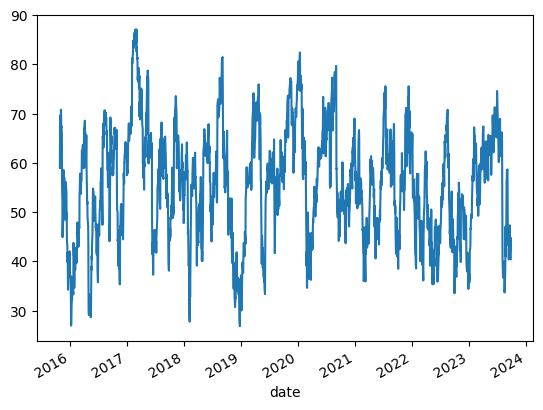

In [12]:
df.xs('AAPL', level=1).rsi.plot()

In [13]:
pandas_ta.bbands(close=df.xs('AAPL', level=1)['adj close'], length=20)

df['bb_low'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:, 0])

df['bb_mid'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:, 1])

df['bb_high'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:, 2])

df

Price                              adj close       close        high  \
date                      ticker                                       
2015-09-29 00:00:00+00:00 A        31.375292   33.740002   34.060001   
                          AAPL     24.595572   27.264999   28.377501   
                          ABBV     35.718925   52.790001   54.189999   
                          ABT      33.145821   39.500000   40.150002   
                          ACGL     23.217773   24.416668   24.456667   
...                                      ...         ...         ...   
2023-09-26 00:00:00+00:00 XYL      88.253998   89.519997   90.849998   
                          YUM     121.017845  124.010002  124.739998   
                          ZBH     111.287468  112.459999  117.110001   
                          ZBRA    223.960007  223.960007  226.649994   
                          ZTS     174.717117  176.869995  178.449997   

Price                                    low        open       volume  \
date                      ticker                                        
2015-09-29 00:00:00+00:00 A        33.240002   33.360001    2252400.0   
                          AAPL     26.965000   28.207500  293461600.0   
                          ABBV     51.880001   53.099998   12842800.0   
                          ABT      39.029999   39.259998   12287500.0   
                          ACGL     24.100000   24.170000    1888800.0   
...                                      ...         ...          ...   
2023-09-26 00:00:00+00:00 XYL      89.500000   90.379997    1322400.0   
                          YUM     123.449997  124.239998    1500600.0   
                          ZBH     112.419998  116.769997    3610500.0   
                          ZBRA    222.580002  225.970001     355400.0   
                          ZTS     176.270004  176.580002    1463200.0   

Price                             garman_klass_vol        rsi    bb_low  \
date                      ticker                                          
2015-09-29 00:00:00+00:00 A              -0.001156        NaN       NaN   
                          AAPL           -0.005949        NaN       NaN   
                          ABBV           -0.059780        NaN       NaN   
                          ABT            -0.010671        NaN       NaN   
                          ACGL           -0.000516        NaN       NaN   
...                                            ...        ...       ...   
2023-09-26 00:00:00+00:00 XYL            -0.000107  26.146732  4.480372   
                          YUM            -0.000213  36.057181  4.801976   
                          ZBH            -0.000058  31.893205  4.743683   
                          ZBRA            0.000133  29.494977  5.400991   
                          ZTS             0.000032  42.623474  5.151393   

Price                               bb_mid   bb_high  
date                      ticker                      
2015-09-29 00:00:00+00:00 A            NaN       NaN  
                          AAPL         NaN       NaN  
                          ABBV         NaN       NaN  
                          ABT          NaN       NaN  
                          ACGL         NaN       NaN  
...                                    ...       ...  
2023-09-26 00:00:00+00:00 XYL     4.562291  4.644210  
                          YUM     4.831939  4.861902  
                          ZBH     4.783349  4.823015  
                          ZBRA    5.539167  5.677342  
                          ZTS     5.210205  5.269017  

[783555 rows x 11 columns]

In [14]:
def compute_atr(stock_data):
    atr = pandas_ta.atr(high=stock_data['high'],
              low=stock_data['low'],
              close=stock_data['close'],
              length=14)
    return atr.sub(atr.mean()).div(atr.std())

df['atr'] = df.groupby(level=1, group_keys=False).apply(compute_atr)

In [15]:
def compute_macd(close):
    macd = pandas_ta.macd(close=close, length=20).iloc[:,0]
    return macd.sub(macd.mean()).div(macd.std())
    
df['macd'] = df.groupby(level=1, group_keys=False)['adj close'].apply(compute_macd)

df

Price                              adj close       close        high  \
date                      ticker                                       
2015-09-29 00:00:00+00:00 A        31.375292   33.740002   34.060001   
                          AAPL     24.595572   27.264999   28.377501   
                          ABBV     35.718925   52.790001   54.189999   
                          ABT      33.145821   39.500000   40.150002   
                          ACGL     23.217773   24.416668   24.456667   
...                                      ...         ...         ...   
2023-09-26 00:00:00+00:00 XYL      88.253998   89.519997   90.849998   
                          YUM     121.017845  124.010002  124.739998   
                          ZBH     111.287468  112.459999  117.110001   
                          ZBRA    223.960007  223.960007  226.649994   
                          ZTS     174.717117  176.869995  178.449997   

Price                                    low        open       volume  \
date                      ticker                                        
2015-09-29 00:00:00+00:00 A        33.240002   33.360001    2252400.0   
                          AAPL     26.965000   28.207500  293461600.0   
                          ABBV     51.880001   53.099998   12842800.0   
                          ABT      39.029999   39.259998   12287500.0   
                          ACGL     24.100000   24.170000    1888800.0   
...                                      ...         ...          ...   
2023-09-26 00:00:00+00:00 XYL      89.500000   90.379997    1322400.0   
                          YUM     123.449997  124.239998    1500600.0   
                          ZBH     112.419998  116.769997    3610500.0   
                          ZBRA    222.580002  225.970001     355400.0   
                          ZTS     176.270004  176.580002    1463200.0   

Price                             garman_klass_vol        rsi    bb_low  \
date                      ticker                                          
2015-09-29 00:00:00+00:00 A              -0.001156        NaN       NaN   
                          AAPL           -0.005949        NaN       NaN   
                          ABBV           -0.059780        NaN       NaN   
                          ABT            -0.010671        NaN       NaN   
                          ACGL           -0.000516        NaN       NaN   
...                                            ...        ...       ...   
2023-09-26 00:00:00+00:00 XYL            -0.000107  26.146732  4.480372   
                          YUM            -0.000213  36.057181  4.801976   
                          ZBH            -0.000058  31.893205  4.743683   
                          ZBRA            0.000133  29.494977  5.400991   
                          ZTS             0.000032  42.623474  5.151393   

Price                               bb_mid   bb_high       atr      macd  
date                      ticker                                          
2015-09-29 00:00:00+00:00 A            NaN       NaN       NaN       NaN  
                          AAPL         NaN       NaN       NaN       NaN  
                          ABBV         NaN       NaN       NaN       NaN  
                          ABT          NaN       NaN       NaN       NaN  
                          ACGL         NaN       NaN       NaN       NaN  
...                                    ...       ...       ...       ...  
2023-09-26 00:00:00+00:00 XYL     4.562291  4.644210  0.033800 -2.159189  
                          YUM     4.831939  4.861902  0.142547 -1.363696  
                          ZBH     4.783349  4.823015 -0.381708 -0.881067  
                          ZBRA    5.539167  5.677342 -0.057389 -1.600791  
                          ZTS     5.210205  5.269017  0.651515 -1.188278  

[783555 rows x 13 columns]

In [16]:
df['dollar_volume'] = (df['adj close']*df['volume'])/1e6
df

Price                              adj close       close        high  \
date                      ticker                                       
2015-09-29 00:00:00+00:00 A        31.375292   33.740002   34.060001   
                          AAPL     24.595572   27.264999   28.377501   
                          ABBV     35.718925   52.790001   54.189999   
                          ABT      33.145821   39.500000   40.150002   
                          ACGL     23.217773   24.416668   24.456667   
...                                      ...         ...         ...   
2023-09-26 00:00:00+00:00 XYL      88.253998   89.519997   90.849998   
                          YUM     121.017845  124.010002  124.739998   
                          ZBH     111.287468  112.459999  117.110001   
                          ZBRA    223.960007  223.960007  226.649994   
                          ZTS     174.717117  176.869995  178.449997   

Price                                    low        open       volume  \
date                      ticker                                        
2015-09-29 00:00:00+00:00 A        33.240002   33.360001    2252400.0   
                          AAPL     26.965000   28.207500  293461600.0   
                          ABBV     51.880001   53.099998   12842800.0   
                          ABT      39.029999   39.259998   12287500.0   
                          ACGL     24.100000   24.170000    1888800.0   
...                                      ...         ...          ...   
2023-09-26 00:00:00+00:00 XYL      89.500000   90.379997    1322400.0   
                          YUM     123.449997  124.239998    1500600.0   
                          ZBH     112.419998  116.769997    3610500.0   
                          ZBRA    222.580002  225.970001     355400.0   
                          ZTS     176.270004  176.580002    1463200.0   

Price                             garman_klass_vol        rsi    bb_low  \
date                      ticker                                          
2015-09-29 00:00:00+00:00 A              -0.001156        NaN       NaN   
                          AAPL           -0.005949        NaN       NaN   
                          ABBV           -0.059780        NaN       NaN   
                          ABT            -0.010671        NaN       NaN   
                          ACGL           -0.000516        NaN       NaN   
...                                            ...        ...       ...   
2023-09-26 00:00:00+00:00 XYL            -0.000107  26.146732  4.480372   
                          YUM            -0.000213  36.057181  4.801976   
                          ZBH            -0.000058  31.893205  4.743683   
                          ZBRA            0.000133  29.494977  5.400991   
                          ZTS             0.000032  42.623474  5.151393   

Price                               bb_mid   bb_high       atr      macd  \
date                      ticker                                           
2015-09-29 00:00:00+00:00 A            NaN       NaN       NaN       NaN   
                          AAPL         NaN       NaN       NaN       NaN   
                          ABBV         NaN       NaN       NaN       NaN   
                          ABT          NaN       NaN       NaN       NaN   
                          ACGL         NaN       NaN       NaN       NaN   
...                                    ...       ...       ...       ...   
2023-09-26 00:00:00+00:00 XYL     4.562291  4.644210  0.033800 -2.159189   
                          YUM     4.831939  4.861902  0.142547 -1.363696   
                          ZBH     4.783349  4.823015 -0.381708 -0.881067   
                          ZBRA    5.539167  5.677342 -0.057389 -1.600791   
                          ZTS     5.210205  5.269017  0.651515 -1.188278   

Price                             dollar_volume  
date                      ticker                 
2015-09-29 00:00:00+00:00 A           70.669707 

## **Aggregate to Monthly level and Filter top 150 most liquid stocks for each month.**
1. To reduce training time and experiment with features and strategies, we convert the bussiness-daily data to month-end frequencies

In [17]:
df.unstack('ticker')['dollar_volume'].resample('M').mean().stack('ticker').to_frame('dollar_volume')

dollar_volume
date                      ticker               
2015-09-30 00:00:00+00:00 A           75.969239
                          AAPL      6915.989303
                          ABBV       448.332256
                          ABT        385.050907
                          ACGL        76.237983
...                                         ...
2023-09-30 00:00:00+00:00 PLTR       651.345225
                          ABNB      1633.500725
                          CEG        195.997264
                          GEHC       212.127121
                          KVUE       664.360326

[37774 rows x 1 columns]

In [18]:
last_cols = [c for c in df.columns.unique(0) if c not in ['dollar_volume', 'volume', 'open', 'high', 'low', 'close']]
last_cols
data = pd.concat([df.unstack('ticker')['dollar_volume'].resample('M').mean().stack('ticker').to_frame('dollar_volume'),
          df.unstack()[last_cols].resample('M').last().stack('ticker')],
          axis=1).dropna()
data

dollar_volume   adj close  garman_klass_vol  \
date                      ticker                                                
2015-11-30 00:00:00+00:00 A          135.525167   38.888996         -0.002190   
                          AAPL      4014.914431   26.793612         -0.003473   
                          ABBV       331.841267   39.708744         -0.064880   
                          ABT        209.554459   37.912800         -0.012576   
                          ACGL        28.174423   22.970539         -0.001121   
...                                         ...         ...               ...   
2023-09-30 00:00:00+00:00 PLTR       651.345225   13.960000          0.000214   
                          ABNB      1633.500725  132.279999          0.000213   
                          CEG        195.997264  107.492867          0.000035   
                          GEHC       212.127121   66.083885          0.000184   
                          KVUE       664.360326   19.814009         -0.000410   

                                        rsi    bb_low    bb_mid   bb_high  \
date                      ticker                                            
2015-11-30 00:00:00+00:00 A       73.421557  3.542646  3.615088  3.687530   
                          AAPL    55.537368  3.279507  3.322815  3.366124   
                          ABBV    49.376855  3.710011  3.758240  3.806469   
                          ABT     56.962514  3.646322  3.668170  3.690018   
                          ACGL    35.682522  3.177974  3.195190  3.212406   
...                                     ...       ...       ...       ...   
2023-09-30 00:00:00+00:00 PLTR    41.544692  2.701939  2.779743  2.857548   
                          ABNB    44.494127  4.857047  4.940924  5.024801   
                          CEG     55.245473  4.648751  4.688923  4.729095   
                          GEHC    40.922355  4.154746  4.212281  4.269817   
                          KVUE    35.706327  3.005097  3.080010  3.154924   

                                       atr      macd  
date                      ticker                      
2015-11-30 00:00:00+00:00 A      -1.033887  0.567158  
                          AAPL   -0.967900 -0.142789  
                          ABBV   -0.526809  0.145676  
                          ABT    -1.064842  0.335557  
                          ACGL   -1.155694 -0.550166  
...                                    ...       ...  
2023-09-30 00:00:00+00:00 PLTR   -0.426167 -0.433581  
                          ABNB   -1.006939 -0.037854  
                          CEG    -0.436215  0.366876  
                          GEHC   -0.893478 -1.116462  
                          KVUE   -0.899746 -1.435621  

[36996 rows x 9 columns]

In [19]:
df.unstack()[last_cols].resample('M').last().stack('ticker')

Price                              adj close  garman_klass_vol        rsi  \
date                      ticker                                            
2015-09-30 00:00:00+00:00 A        31.923939         -0.001401        NaN   
                          AAPL     24.875223         -0.003682        NaN   
                          ABBV     36.815056         -0.053961        NaN   
                          ABT      33.749992         -0.010389        NaN   
                          ACGL     23.287504         -0.000921        NaN   
...                                      ...               ...        ...   
2023-09-30 00:00:00+00:00 XYL      88.253998         -0.000107  26.146732   
                          YUM     121.017845         -0.000213  36.057181   
                          ZBH     111.287468         -0.000058  31.893205   
                          ZBRA    223.960007          0.000133  29.494977   
                          ZTS     174.717117          0.000032  42.623474   

Price                               bb_low    bb_mid   bb_high       atr  \
date                      ticker                                           
2015-09-30 00:00:00+00:00 A            NaN       NaN       NaN       NaN   
                          AAPL         NaN       NaN       NaN       NaN   
                          ABBV         NaN       NaN       NaN       NaN   
                          ABT          NaN       NaN       NaN       NaN   
                          ACGL         NaN       NaN       NaN       NaN   
...                                    ...       ...       ...       ...   
2023-09-30 00:00:00+00:00 XYL     4.480372  4.562291  4.644210  0.033800   
                          YUM     4.801976  4.831939  4.861902  0.142547   
                          ZBH     4.743683  4.783349  4.823015 -0.381708   
                          ZBRA    5.400991  5.539167  5.677342 -0.057389   
                          ZTS     5.151393  5.210205  5.269017  0.651515   

Price                                 macd  
date                      ticker            
2015-09-30 00:00:00+00:00 A            NaN  
                          AAPL         NaN  
                          ABBV         NaN  
                          ABT          NaN  
                          ACGL         NaN  
...                                    ...  
2023-09-30 00:00:00+00:00 XYL    -2.159189  
                          YUM    -1.363696  
                          ZBH    -0.881067  
                          ZBRA   -1.600791  
                          ZTS    -1.188278  

[37774 rows x 8 columns]

* Calculate 5-year rolling average of dollar volume for each stocks before filtering

In [20]:
data['dolar_volume'] = (data['dollar_volume'].unstack('ticker').rolling(5*12).mean().stack())

data['dollar_vol_rank'] = data.groupby('date')['dollar_volume'].rank(ascending=False)

data

dollar_volume   adj close  garman_klass_vol  \
date                      ticker                                                
2015-11-30 00:00:00+00:00 A          135.525167   38.888996         -0.002190   
                          AAPL      4014.914431   26.793612         -0.003473   
                          ABBV       331.841267   39.708744         -0.064880   
                          ABT        209.554459   37.912800         -0.012576   
                          ACGL        28.174423   22.970539         -0.001121   
...                                         ...         ...               ...   
2023-09-30 00:00:00+00:00 PLTR       651.345225   13.960000          0.000214   
                          ABNB      1633.500725  132.279999          0.000213   
                          CEG        195.997264  107.492867          0.000035   
                          GEHC       212.127121   66.083885          0.000184   
                          KVUE       664.360326   19.814009         -0.000410   

                                        rsi    bb_low    bb_mid   bb_high  \
date                      ticker                                            
2015-11-30 00:00:00+00:00 A       73.421557  3.542646  3.615088  3.687530   
                          AAPL    55.537368  3.279507  3.322815  3.366124   
                          ABBV    49.376855  3.710011  3.758240  3.806469   
                          ABT     56.962514  3.646322  3.668170  3.690018   
                          ACGL    35.682522  3.177974  3.195190  3.212406   
...                                     ...       ...       ...       ...   
2023-09-30 00:00:00+00:00 PLTR    41.544692  2.701939  2.779743  2.857548   
                          ABNB    44.494127  4.857047  4.940924  5.024801   
                          CEG     55.245473  4.648751  4.688923  4.729095   
                          GEHC    40.922355  4.154746  4.212281  4.269817   
                          KVUE    35.706327  3.005097  3.080010  3.154924   

                                       atr      macd  dolar_volume  \
date                      ticker                                     
2015-11-30 00:00:00+00:00 A      -1.033887  0.567158           NaN   
                          AAPL   -0.967900 -0.142789           NaN   
                          ABBV   -0.526809  0.145676           NaN   
                          ABT    -1.064842  0.335557           NaN   
                          ACGL   -1.155694 -0.550166           NaN   
...                                    ...       ...           ...   
2023-09-30 00:00:00+00:00 PLTR   -0.426167 -0.433581           NaN   
                          ABNB   -1.006939 -0.037854           NaN   
                          CEG    -0.436215  0.366876           NaN   
                          GEHC   -0.893478 -1.116462           NaN   
                          KVUE   -0.899746 -1.435621           NaN   

                                  dollar_vol_rank  
date                      ticker                   
2015-11-30 00:00:00+00:00 A                 146.0  
                          AAPL                2.0  
                          ABBV               42.0  
                          ABT                86.0  
                          ACGL              344.0  
...                                           ...  
2023-09-30 00:00:00+00:00 PLTR               46.0  
                          ABNB               15.0  
                          CEG               196.0  
                          GEHC              185.0  
                          KVUE               43.0  

[36996 rows x 11 columns]

In [21]:
data

dollar_volume   adj close  garman_klass_vol  \
date                      ticker                                                
2015-11-30 00:00:00+00:00 A          135.525167   38.888996         -0.002190   
                          AAPL      4014.914431   26.793612         -0.003473   
                          ABBV       331.841267   39.708744         -0.064880   
                          ABT        209.554459   37.912800         -0.012576   
                          ACGL        28.174423   22.970539         -0.001121   
...                                         ...         ...               ...   
2023-09-30 00:00:00+00:00 PLTR       651.345225   13.960000          0.000214   
                          ABNB      1633.500725  132.279999          0.000213   
                          CEG        195.997264  107.492867          0.000035   
                          GEHC       212.127121   66.083885          0.000184   
                          KVUE       664.360326   19.814009         -0.000410   

                                        rsi    bb_low    bb_mid   bb_high  \
date                      ticker                                            
2015-11-30 00:00:00+00:00 A       73.421557  3.542646  3.615088  3.687530   
                          AAPL    55.537368  3.279507  3.322815  3.366124   
                          ABBV    49.376855  3.710011  3.758240  3.806469   
                          ABT     56.962514  3.646322  3.668170  3.690018   
                          ACGL    35.682522  3.177974  3.195190  3.212406   
...                                     ...       ...       ...       ...   
2023-09-30 00:00:00+00:00 PLTR    41.544692  2.701939  2.779743  2.857548   
                          ABNB    44.494127  4.857047  4.940924  5.024801   
                          CEG     55.245473  4.648751  4.688923  4.729095   
                          GEHC    40.922355  4.154746  4.212281  4.269817   
                          KVUE    35.706327  3.005097  3.080010  3.154924   

                                       atr      macd  dolar_volume  \
date                      ticker                                     
2015-11-30 00:00:00+00:00 A      -1.033887  0.567158           NaN   
                          AAPL   -0.967900 -0.142789           NaN   
                          ABBV   -0.526809  0.145676           NaN   
                          ABT    -1.064842  0.335557           NaN   
                          ACGL   -1.155694 -0.550166           NaN   
...                                    ...       ...           ...   
2023-09-30 00:00:00+00:00 PLTR   -0.426167 -0.433581           NaN   
                          ABNB   -1.006939 -0.037854           NaN   
                          CEG    -0.436215  0.366876           NaN   
                          GEHC   -0.893478 -1.116462           NaN   
                          KVUE   -0.899746 -1.435621           NaN   

                                  dollar_vol_rank  
date                      ticker                   
2015-11-30 00:00:00+00:00 A                 146.0  
                          AAPL                2.0  
                          ABBV               42.0  
                          ABT                86.0  
                          ACGL              344.0  
...                                           ...  
2023-09-30 00:00:00+00:00 PLTR               46.0  
                          ABNB               15.0  
                          CEG               196.0  
                          GEHC              185.0  
                          KVUE               43.0  

[36996 rows x 11 columns]

## 4. Calculate Monthly Returns for different time horizons as features.
* To capture time series dynamics, for example, momentum patterns, we compute historical returns using the method .pct_change(lag), that is, returns over various other monthly period as labelled by lags.

In [22]:
def calculate_return(df):    
    outlier_cutoff = 0.005
    
    lags = [1, 2, 3, 6, 9, 12]
    
    for lag in lags:
        df[f'return_{lag}m'] = (df['adj close']
                              .pct_change(lag)
                              .pipe(lambda x: x.clip(lower=x.quantile(outlier_cutoff),
                                                                     upper=x.quantile(1-outlier_cutoff)))
                                   
                               .add(1)
                               .pow(1/lag)
                               .sub(1))
    return df

data = data.groupby(level=1, group_keys=False).apply(calculate_return).dropna()

In [23]:
data

dollar_volume   adj close  garman_klass_vol  \
date                      ticker                                                
2020-10-31 00:00:00+00:00 A          101.512784   99.479912         -0.000060   
                          AAPL     14994.630655  106.265953          0.000003   
                          ABBV       561.591585   72.475563         -0.006667   
                          ABT        468.595549   97.852409         -0.001528   
                          ACGL        46.655140   28.726645          0.000792   
...                                         ...         ...               ...   
2023-09-30 00:00:00+00:00 HWM        118.189384   45.623222          0.000032   
                          INVH        85.837461   30.730167         -0.000789   
                          IR         188.262652   62.718628          0.000251   
                          VICI       128.519401   27.619099         -0.001578   
                          DAY         74.857681   66.220001          0.000146   

                                        rsi    bb_low    bb_mid   bb_high  \
date                      ticker                                            
2020-10-31 00:00:00+00:00 A       49.807578  4.603014  4.633790  4.664567   
                          AAPL    43.770310  4.683823  4.742640  4.801458   
                          ABBV    47.517621  4.248933  4.292315  4.335697   
                          ABT     48.047148  4.591260  4.618591  4.645922   
                          ACGL    48.895677  3.360956  3.405910  3.450864   
...                                     ...       ...       ...       ...   
2023-09-30 00:00:00+00:00 HWM     37.258642  3.828683  3.879220  3.929757   
                          INVH    34.504851  3.467638  3.513829  3.560021   
                          IR      36.160864  4.153524  4.221698  4.289871   
                          VICI    35.939982  3.366272  3.396125  3.425978   
                          DAY     38.799259  4.189962  4.280162  4.370362   

                                       atr      macd  dolar_volume  \
date                      ticker                                     
2020-10-31 00:00:00+00:00 A       0.126135  0.222999    130.805679   
                          AAPL    1.409489 -0.628203   6366.229535   
                          ABBV   -0.194581 -0.994069    458.700586   
                          ABT     0.983090 -0.069482    372.469359   
                          ACGL    0.733586 -0.304574     41.616448   
...                                    ...       ...           ...   
2023-09-30 00:00:00+00:00 HWM    -0.124649 -1.179677     95.107622   
                          INVH   -0.241995 -0.961586    109.375981   
                          IR      0.681258 -1.364146    102.815461   
                          VICI   -0.629713 -0.641514    135.013121   
                          DAY    -0.930349 -0.730965     86.710947   

                                  dollar_vol_rank  return_1m  return_2m  \
date                      ticker                                          
2020-10-31 00:00:00+00:00 A                 261.0   0.013216   0.009189   
                          AAPL                3.0  -0.060012  -0.081515   
                          ABBV               44.0  -0.015197  -0.050954   
                          ABT                58.0  -0.030963  -0.018485   
                          ACGL              376.0   0.032821  -0.021311   
...                                           ...        ...        ...   
2023-09-30 00:00:00+00:00 HWM               297.0  -0.073984  -0.053151   
                          INVH              355.0  -0.061308  -0.047004   
                          IR                210.0  -0.097975  -0.019035   
                          VICI              279.0  -0.040655  -0.030546   
                          DAY               368.0  -0.086873  -0.032954   

                                  return_3m  return_6m  return_9m  return_12m  
date       

## 5. Download Fama-French Factors and Calculate Rolling Factors Betas.
* we will introduce Fama-French data to estimate the exposure of assets to common risk factor using linear regression
* the five Fama-French factors, namely market risk, size, value, operating profitability and investment have been shown empirically to explain asset returns are commonly used to asses the risk/return profile of portfolio. Hence, it is natural to include past factor exposures as financial features in models.
* we can access the historical factor returns using the pandas-datareader and estimate historical exposures using RollingOLS rolling linear regression

In [24]:
factor_data = web.DataReader('F-F_Research_Data_5_Factors_2x3',
              'famafrench',
              start='2010')[0].drop('RF', axis=1)

factor_data.index = factor_data.index.to_timestamp()

In [25]:
factor_data = factor_data.resample('M').last().div(100)

In [26]:
factor_data.index.name = 'date'

In [27]:
factor_data

,Mkt-RF,SMB,HML,RMW,CMA
date,,,,,
2010-01-31,-0.0336,0.0034,0.0043,-0.0127,0.0046
2010-02-28,0.0340,0.0151,0.0322,-0.0027,0.0142
2010-03-31,0.0631,0.0185,0.0221,-0.0065,0.0169
2010-04-30,0.0200,0.0498,0.0289,0.0069,0.0172
2010-05-31,-0.0789,0.0005,-0.0244,0.0130,-0.0022
...,...,...,...,...,...
2024-06-30,0.0277,-0.0437,-0.0331,0.0051,-0.0178
2024-07-31,0.0124,0.0828,0.0574,0.0022,0.0043
2024-08-31,0.0161,-0.0365,-0.0113,0.0085,0.0086


In [28]:
factor_data.loc['2016-11-30']

Mkt-RF    0.0486
SMB       0.0707
HML       0.0821
RMW      -0.0018
CMA       0.0369
Name: 2016-11-30 00:00:00, dtype: float64

In [29]:
# Reset the 'date' level to contain only the date (YYYY-MM-DD format)
data.index = data.index.set_levels(
    data.index.levels[0].strftime('%Y-%m-%d'), level='date'
)

In [30]:
data['return_1m'].index = data['return_1m'].index.set_levels(
    pd.to_datetime(data['return_1m'].index.levels[0]), level='date'
)

In [31]:
factor_data = factor_data.join(data['return_1m']).sort_index()
factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2020-10-31 A      -0.0210  0.0454  0.0431 -0.0076 -0.0088   0.013216
           AAPL   -0.0210  0.0454  0.0431 -0.0076 -0.0088  -0.060012
           ABBV   -0.0210  0.0454  0.0431 -0.0076 -0.0088  -0.015197
           ABT    -0.0210  0.0454  0.0431 -0.0076 -0.0088  -0.030963
           ACGL   -0.0210  0.0454  0.0431 -0.0076 -0.0088   0.032821
...                   ...     ...     ...     ...     ...        ...
2023-09-30 XYL    -0.0524 -0.0179  0.0145  0.0185 -0.0084  -0.135407
           YUM    -0.0524 -0.0179  0.0145  0.0185 -0.0084  -0.041506
           ZBH    -0.0524 -0.0179  0.0145  0.0185 -0.0084  -0.055910
           ZBRA   -0.0524 -0.0179  0.0145  0.0185 -0.0084  -0.185630
           ZTS    -0.0524 -0.0179  0.0145  0.0185 -0.0084  -0.071597

[13723 rows x 6 columns]

In [32]:
factor_data.xs('AAPL', level=1)

,Mkt-RF,SMB,HML,RMW,CMA,return_1m
date,,,,,,
2020-10-31,-0.0210,0.0454,0.0431,-0.0076,-0.0088,-0.060012
2020-11-30,0.1247,0.0705,0.0215,-0.0222,0.0128,0.095493
2020-12-31,0.0463,0.0470,-0.0134,-0.0188,-0.0026,0.114574
2021-01-31,-0.0003,0.0708,0.0285,-0.0392,0.0518,-0.005502
2021-02-28,0.0278,0.0456,0.0710,0.0039,-0.0195,-0.079712
2021-03-31,0.0308,-0.0078,0.0727,0.0634,0.0357,0.007340
2021-04-30,0.0493,-0.0316,-0.0095,0.0247,-0.0271,0.076218
2021-05-31,0.0029,0.0120,0.0713,0.0240,0.0302,-0.050497
2021-06-30,0.0275,-0.0041,-0.0775,-0.0204,-0.0102,0.099109


In [33]:
factor_data.xs('MSFT', level=1).head()

,Mkt-RF,SMB,HML,RMW,CMA,return_1m
date,,,,,,
2020-10-31,-0.0210,0.0454,0.0431,-0.0076,-0.0088,-0.037370
2020-11-30,0.1247,0.0705,0.0215,-0.0222,0.0128,0.060061
2020-12-31,0.0463,0.0470,-0.0134,-0.0188,-0.0026,0.039006
2021-01-31,-0.0003,0.0708,0.0285,-0.0392,0.0518,0.042892
2021-02-28,0.0278,0.0456,0.0710,0.0039,-0.0195,0.004118


In [34]:
observations = factor_data.groupby(level=1).size()

valid_stocks = observations[observations >= 10]

factor_data = factor_data[factor_data.index.get_level_values('ticker').isin(valid_stocks.index)]

factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2020-10-31 A      -0.0210  0.0454  0.0431 -0.0076 -0.0088   0.013216
           AAPL   -0.0210  0.0454  0.0431 -0.0076 -0.0088  -0.060012
           ABBV   -0.0210  0.0454  0.0431 -0.0076 -0.0088  -0.015197
           ABT    -0.0210  0.0454  0.0431 -0.0076 -0.0088  -0.030963
           ACGL   -0.0210  0.0454  0.0431 -0.0076 -0.0088   0.032821
...                   ...     ...     ...     ...     ...        ...
2023-09-30 XYL    -0.0524 -0.0179  0.0145  0.0185 -0.0084  -0.135407
           YUM    -0.0524 -0.0179  0.0145  0.0185 -0.0084  -0.041506
           ZBH    -0.0524 -0.0179  0.0145  0.0185 -0.0084  -0.055910
           ZBRA   -0.0524 -0.0179  0.0145  0.0185 -0.0084  -0.185630
           ZTS    -0.0524 -0.0179  0.0145  0.0185 -0.0084  -0.071597

[13709 rows x 6 columns]

# Calculate the rolling factor betas

In [35]:
betas = (factor_data.groupby(level=1,
                   group_keys=False)
.apply(lambda x: RollingOLS(endog=x['return_1m'],
                           exog=sm.add_constant(x.drop('return_1m', axis=1)),
                           window=min(24, x.shape[0]),
                           min_nobs=len(x.columns)+1)
.fit(params_only=True)
.params
.drop('const', axis=1)))

betas

Mkt-RF       SMB       HML       RMW       CMA
date       ticker                                                  
2020-10-31 A            NaN       NaN       NaN       NaN       NaN
           AAPL         NaN       NaN       NaN       NaN       NaN
           ABBV         NaN       NaN       NaN       NaN       NaN
           ABT          NaN       NaN       NaN       NaN       NaN
           ACGL         NaN       NaN       NaN       NaN       NaN
...                     ...       ...       ...       ...       ...
2023-09-30 XYL     1.034556  0.299066  0.137700  0.561310 -0.089161
           YUM     0.733056  0.654249 -0.351002  1.073917  0.713211
           ZBH     0.843749  0.115595 -0.558552 -0.624235  1.418469
           ZBRA    1.431534  1.132889 -0.472182  0.996125 -0.031643
           ZTS     0.688732  1.057626 -0.389916  1.221931 -0.059339

[13709 rows x 5 columns]

In [36]:
betas.groupby('ticker').shift()

Mkt-RF       SMB       HML       RMW       CMA
date       ticker                                                  
2020-10-31 A            NaN       NaN       NaN       NaN       NaN
           AAPL         NaN       NaN       NaN       NaN       NaN
           ABBV         NaN       NaN       NaN       NaN       NaN
           ABT          NaN       NaN       NaN       NaN       NaN
           ACGL         NaN       NaN       NaN       NaN       NaN
...                     ...       ...       ...       ...       ...
2023-09-30 XYL     0.980478  0.197894  0.242531  0.661415 -0.287227
           YUM     0.743484  0.666642 -0.380778  1.083920  0.747142
           ZBH     0.865162  0.149486 -0.608356 -0.638457  1.493202
           ZBRA    1.366843  1.028907 -0.323873  1.045675 -0.258369
           ZTS     0.656865  1.014254 -0.306311  1.214013 -0.166323

[13709 rows x 5 columns]

In [37]:
# # betas.index
# betas.index.get_level_values('date').unique()
pd.to_datetime(data.index.get_level_values('date').unique())

DatetimeIndex(['2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31',
               '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31',
               '2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30',
               '2021-10-31', '2021-11-30', '2021-12-31', '2022-01-31',
               '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31',
               '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30',
               '2022-10-31', '2022-11-30', '2022-12-31', '2023-01-31',
               '2023-02-28', '2023-03-31', '2023-04-30', '2023-05-31',
               '2023-06-30', '2023-07-31', '2023-08-31', '2023-09-30'],
              dtype='datetime64[ns]', name='date', freq=None)

In [38]:
pd.to_datetime(betas.index.get_level_values('date').unique())

DatetimeIndex(['2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31',
               '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31',
               '2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30',
               '2021-10-31', '2021-11-30', '2021-12-31', '2022-01-31',
               '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31',
               '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30',
               '2022-10-31', '2022-11-30', '2022-12-31', '2023-01-31',
               '2023-02-28', '2023-03-31', '2023-04-30', '2023-05-31',
               '2023-06-30', '2023-07-31', '2023-08-31', '2023-09-30'],
              dtype='datetime64[ns]', name='date', freq=None)

In [39]:
factors = ['Mkt-RF','SMB','HML', 'RMW', 'CMA']

data = (data.join(betas.groupby('ticker').shift()))

In [40]:
data

dollar_volume   adj close  garman_klass_vol        rsi  \
date       ticker                                                           
2020-10-31 A          101.512784   99.479912         -0.000060  49.807578   
           AAPL     14994.630655  106.265953          0.000003  43.770310   
           ABBV       561.591585   72.475563         -0.006667  47.517621   
           ABT        468.595549   97.852409         -0.001528  48.047148   
           ACGL        46.655140   28.726645          0.000792  48.895677   
...                          ...         ...               ...        ...   
2023-09-30 HWM        118.189384   45.623222          0.000032  37.258642   
           INVH        85.837461   30.730167         -0.000789  34.504851   
           IR         188.262652   62.718628          0.000251  36.160864   
           VICI       128.519401   27.619099         -0.001578  35.939982   
           DAY         74.857681   66.220001          0.000146  38.799259   

                     bb_low    bb_mid   bb_high       atr      macd  \
date       ticker                                                     
2020-10-31 A       4.603014  4.633790  4.664567  0.126135  0.222999   
           AAPL    4.683823  4.742640  4.801458  1.409489 -0.628203   
           ABBV    4.248933  4.292315  4.335697 -0.194581 -0.994069   
           ABT     4.591260  4.618591  4.645922  0.983090 -0.069482   
           ACGL    3.360956  3.405910  3.450864  0.733586 -0.304574   
...                     ...       ...       ...       ...       ...   
2023-09-30 HWM     3.828683  3.879220  3.929757 -0.124649 -1.179677   
           INVH    3.467638  3.513829  3.560021 -0.241995 -0.961586   
           IR      4.153524  4.221698  4.289871  0.681258 -1.364146   
           VICI    3.366272  3.396125  3.425978 -0.629713 -0.641514   
           DAY     4.189962  4.280162  4.370362 -0.930349 -0.730965   

                   dolar_volume  ...  return_2m  return_3m  return_6m  \
date       ticker                ...                                    
2020-10-31 A         130.805679  ...   0.009189   0.020159   0.049586   
           AAPL     6366.229535  ...  -0.081515   0.008696   0.068576   
           ABBV      458.700586  ...  -0.050954  -0.031357   0.010106   
           ABT       372.469359  ...  -0.018485   0.015717   0.023513   
           ACGL       41.616448  ...  -0.021311  -0.005888   0.038882   
...                         ...  ...        ...        ...        ...   
2023-09-30 HWM        95.107622  ...  -0.053151  -0.025616   0.013387   
           INVH      109.375981  ...  -0.047004  -0.021373   0.006598   
           IR        102.815461  ...  -0.019035  -0.013184   0.012897   
           VICI      135.013121  ...  -0.030546  -0.019950  -0.014119   
           DAY        86.710947  ...  -0.032954  -0.003747  -0.016608   

                   return_9m  return_12m  Mkt-RF  SMB  HML  RMW  CMA  
date       ticker                                                     
2020-10-31 A        0.024606    0.025911     NaN  NaN  NaN  NaN  NaN  
           AAPL     0.039452    0.048624     NaN  NaN  NaN  NaN  NaN  
           ABBV     0.010004    0.010161     NaN  NaN  NaN  NaN  NaN  
           ABT      0.022346    0.020583     NaN  NaN  NaN  NaN  NaN  
           ACGL    -0.041306   -0.026620     NaN  NaN  NaN  NaN  NaN  
...                      ...         ...     ...  ...  ...  ...  ...  
2023-09-30 HWM      0.017167    0.033604     NaN  NaN  NaN  NaN  NaN  
           INVH     0.011139   -0.001967     NaN  NaN  NaN  NaN  NaN  
           IR       0.020738    0.031649     NaN  NaN  NaN  NaN  NaN  
           VICI    -0.007318    0.002312     NaN  NaN  NaN  NaN  NaN  
           DAY      0.003535    0.014249     NaN  NaN  NaN  NaN  NaN  

[13723 rows x 22 columns]

In [41]:
# betas.groupby('ticker').shift()

factors = ['Mkt-RF','SMB','HML', 'RMW', 'CMA']

# data = (data.join(betas.groupby('ticker').shift()))
data.loc[:, factors] = data.groupby('ticker', group_keys=False)[factors].apply(lambda x: x.fillna(x.mean()))

data

dollar_volume   adj close  garman_klass_vol        rsi  \
date       ticker                                                           
2020-10-31 A          101.512784   99.479912         -0.000060  49.807578   
           AAPL     14994.630655  106.265953          0.000003  43.770310   
           ABBV       561.591585   72.475563         -0.006667  47.517621   
           ABT        468.595549   97.852409         -0.001528  48.047148   
           ACGL        46.655140   28.726645          0.000792  48.895677   
...                          ...         ...               ...        ...   
2023-09-30 HWM        118.189384   45.623222          0.000032  37.258642   
           INVH        85.837461   30.730167         -0.000789  34.504851   
           IR         188.262652   62.718628          0.000251  36.160864   
           VICI       128.519401   27.619099         -0.001578  35.939982   
           DAY         74.857681   66.220001          0.000146  38.799259   

                     bb_low    bb_mid   bb_high       atr      macd  \
date       ticker                                                     
2020-10-31 A       4.603014  4.633790  4.664567  0.126135  0.222999   
           AAPL    4.683823  4.742640  4.801458  1.409489 -0.628203   
           ABBV    4.248933  4.292315  4.335697 -0.194581 -0.994069   
           ABT     4.591260  4.618591  4.645922  0.983090 -0.069482   
           ACGL    3.360956  3.405910  3.450864  0.733586 -0.304574   
...                     ...       ...       ...       ...       ...   
2023-09-30 HWM     3.828683  3.879220  3.929757 -0.124649 -1.179677   
           INVH    3.467638  3.513829  3.560021 -0.241995 -0.961586   
           IR      4.153524  4.221698  4.289871  0.681258 -1.364146   
           VICI    3.366272  3.396125  3.425978 -0.629713 -0.641514   
           DAY     4.189962  4.280162  4.370362 -0.930349 -0.730965   

                   dolar_volume  ...  return_2m  return_3m  return_6m  \
date       ticker                ...                                    
2020-10-31 A         130.805679  ...   0.009189   0.020159   0.049586   
           AAPL     6366.229535  ...  -0.081515   0.008696   0.068576   
           ABBV      458.700586  ...  -0.050954  -0.031357   0.010106   
           ABT       372.469359  ...  -0.018485   0.015717   0.023513   
           ACGL       41.616448  ...  -0.021311  -0.005888   0.038882   
...                         ...  ...        ...        ...        ...   
2023-09-30 HWM        95.107622  ...  -0.053151  -0.025616   0.013387   
           INVH      109.375981  ...  -0.047004  -0.021373   0.006598   
           IR        102.815461  ...  -0.019035  -0.013184   0.012897   
           VICI      135.013121  ...  -0.030546  -0.019950  -0.014119   
           DAY        86.710947  ...  -0.032954  -0.003747  -0.016608   

                   return_9m  return_12m    Mkt-RF       SMB       HML  \
date       ticker                                                        
2020-10-31 A        0.024606    0.025911  1.093597  0.353974 -0.068965   
           AAPL     0.039452    0.048624  1.166930 -0.299165 -0.454597   
           ABBV     0.010004    0.010161  0.505229 -0.161712 -0.387469   
           ABT      0.022346    0.020583  0.675211  0.055411 -0.336906   
           ACGL    -0.041306   -0.026620  0.700155  0.056986  0.320726   
...                      ...         ...       ...       ...       ...   
2023-09-30 HWM      0.017167    0.033604       NaN       NaN       NaN   
           INVH     0.011139   -0.001967       NaN       NaN       NaN   
           IR       0.020738    0.031649       NaN       NaN       NaN   
           VICI    -0.007318    0.002312       NaN       NaN       NaN   
           DAY      0.003535    0.014249       NaN       NaN       NaN   

                        RMW       CMA  
date       ticker                      
2020-10-31 A       0.450799  0.119583  
           AAPL    0.224567  0.126334  
           ABBV    0

In [42]:
data.dropna()
data.info()
data.drop('adj close', axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 13723 entries, ('2020-10-31', 'A') to ('2023-09-30', 'DAY')
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dollar_volume     13723 non-null  float64
 1   adj close         13723 non-null  float64
 2   garman_klass_vol  13723 non-null  float64
 3   rsi               13723 non-null  float64
 4   bb_low            13723 non-null  float64
 5   bb_mid            13723 non-null  float64
 6   bb_high           13723 non-null  float64
 7   atr               13723 non-null  float64
 8   macd              13723 non-null  float64
 9   dolar_volume      13723 non-null  float64
 10  dollar_vol_rank   13723 non-null  float64
 11  return_1m         13723 non-null  float64
 12  return_2m         13723 non-null  float64
 13  return_3m         13723 non-null  float64
 14  return_6m         13723 non-null  float64
 15  return_9m         13723 non-null  float64
 16  return

## ML
* 6. for each months we will use the K-Means Clustering Alogoriithm to group similar asset bnased on their features

In [44]:
from sklearn.cluster import KMeans
# data = data.drop('cluster', axis=1)

def get_cluster(df):
    df['cluster'] = KMeans(n_clusters=4,
                          random_state=0,
                          init='random').fit(df).labels_
    return df

data = data.dropna().groupby('date', group_keys=False).apply(get_cluster)

data

  File "C:\Users\user\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Program Files\Python312\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


dollar_volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                         
2020-10-31 A          101.512784         -0.000060  49.807578  4.603014   
           AAPL     14994.630655          0.000003  43.770310  4.683823   
           ABBV       561.591585         -0.006667  47.517621  4.248933   
           ABT        468.595549         -0.001528  48.047148  4.591260   
           ACGL        46.655140          0.000792  48.895677  3.360956   
...                          ...               ...        ...       ...   
2023-09-30 ZBRA       105.780863          0.000133  29.494977  5.400991   
           ZTS        286.159191          0.000032  42.623474  5.151393   
           HPE        173.478000         -0.000275  46.663954  2.838359   
           FTV        119.297202          0.000164  40.109419  4.301116   
           DELL       456.584647         -0.000306  63.279449  4.051259   

                     bb_mid   bb_high       atr      macd  dolar_volume  \
date       ticker                                                         
2020-10-31 A       4.633790  4.664567  0.126135  0.222999    130.805679   
           AAPL    4.742640  4.801458  1.409489 -0.628203   6366.229535   
           ABBV    4.292315  4.335697 -0.194581 -0.994069    458.700586   
           ABT     4.618591  4.645922  0.983090 -0.069482    372.469359   
           ACGL    3.405910  3.450864  0.733586 -0.304574     41.616448   
...                     ...       ...       ...       ...           ...   
2023-09-30 ZBRA    5.539167  5.677342 -0.057389 -1.600791    124.051293   
           ZTS     5.210205  5.269017  0.651515 -1.188278    294.650502   
           HPE     2.870252  2.902146 -0.317697 -0.267964    141.496227   
           FTV     4.346871  4.392626 -0.089536 -0.942762    152.741803   
           DELL    4.206146  4.361034  2.128167  3.376569    176.894466   

                   dollar_vol_rank  ...  return_3m  return_6m  return_9m  \
date       ticker                   ...                                    
2020-10-31 A                 261.0  ...   0.020159   0.049586   0.024606   
           AAPL                3.0  ...   0.008696   0.068576   0.039452   
           ABBV               44.0  ...  -0.031357   0.010106   0.010004   
           ABT                58.0  ...   0.015717   0.023513   0.022346   
           ACGL              376.0  ...  -0.005888   0.038882  -0.041306   
...                            ...  ...        ...        ...        ...   
2023-09-30 ZBRA              323.0  ...  -0.088599  -0.056756  -0.014922   
           ZTS               128.0  ...   0.009679   0.010913   0.021873   
           HPE               228.0  ...   0.001955   0.011107   0.008150   
           FTV               296.0  ...  -0.006485   0.012408   0.015031   
           DELL               80.0  ...   0.086544   0.095611   0.064477   

                   return_12m    Mkt-RF       SMB       HML       RMW  \
date       ticker                                                       
2020-10-31 A         0.025911  1.093597  0.353974 -0.068965  0.450799   
           AAPL      0.048624  1.166930 -0.299165 -0.454597  0.224567   
           ABBV      0.010161  0.505229 -0.161712 -0.387469  0.456775   
           ABT       0.020583  0.675211  0.055411 -0.336906  0.524448   
           ACGL     -0.026620  0.700155  0.056986  0.320726 -0.032259   
...                       ...       ...       ...       ...       ...   
2023-09-30 ZBRA     -0.012991  1.366843  1.028907 -0.323873  1.045675   
           ZTS       0.015541  0.656865  1.014254 -0.306311  1.214013   
           HPE       0.031078  1.311779 -0.158459  0.333469  0.390805   
           FTV       0.019566  1.037842  0.026497  0.893555  0.425243   
           DELL      0.063164  0.862053 -0.597147  0.962871  1.094781   

                        CMA  cluster  
date       ticker                     
2020-10-31 A       0.119583        3  
           

In [45]:
def plot_clusters(data):
    cluster_0 = data[data['cluster']==0]
    cluster_1 = data[data['cluster']==1]
    cluster_2 = data[data['cluster']==2]
    cluster_3 = data[data['cluster']==3]

    plt.scatter(cluster_0.iloc[:, 0], cluster_0.iloc[:, 6], color='red', label='cluster 0')
    plt.scatter(cluster_1.iloc[:, 0], cluster_1.iloc[:, 6], color='green', label='cluster 1')
    plt.scatter(cluster_2.iloc[:, 0], cluster_2.iloc[:, 6], color='blue', label='cluster 2')
    plt.scatter(cluster_3.iloc[:, 0], cluster_3.iloc[:, 6], color='black', label='cluster 3')

    plt.legend()
    plt.show()
    return

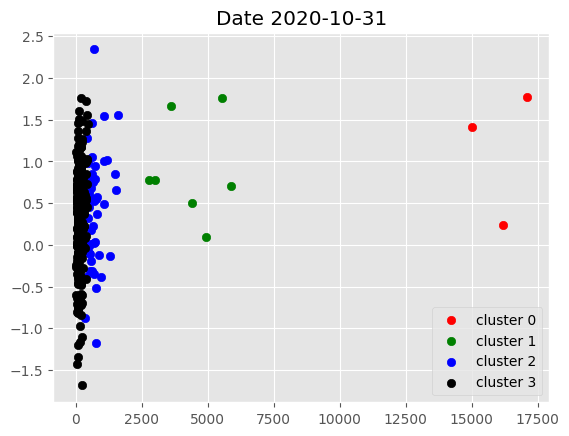

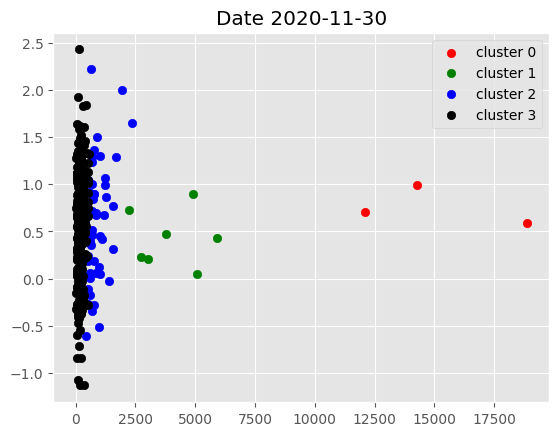

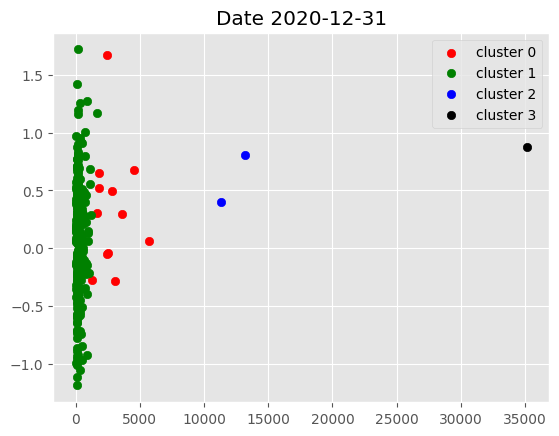

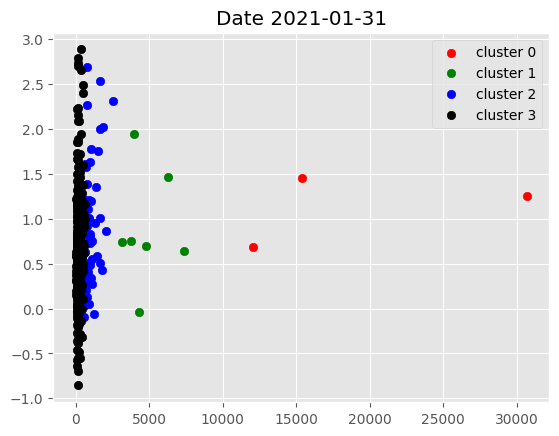

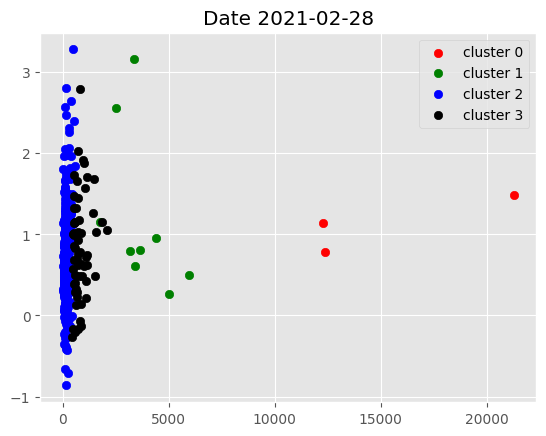

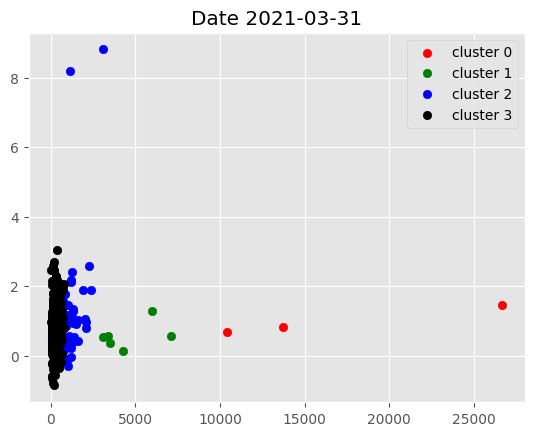

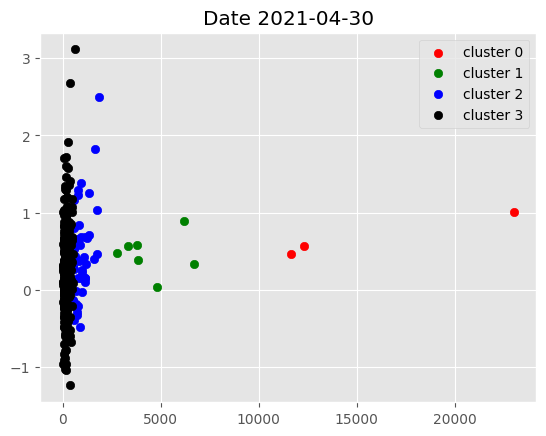

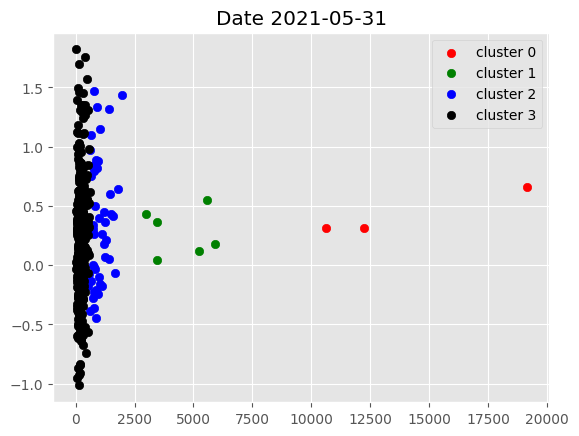

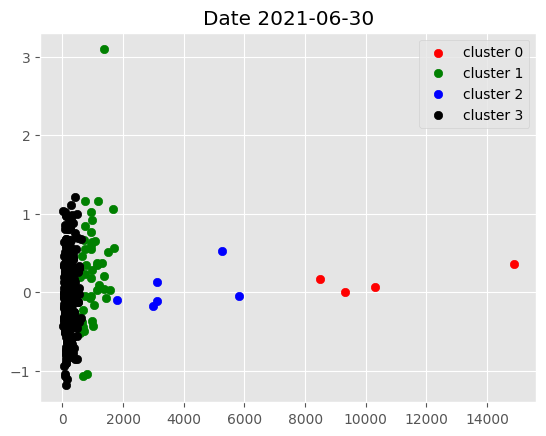

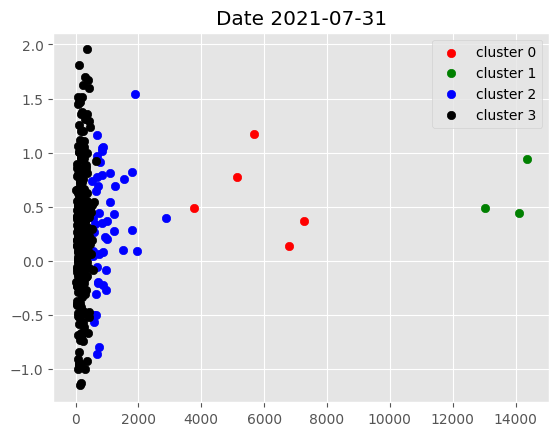

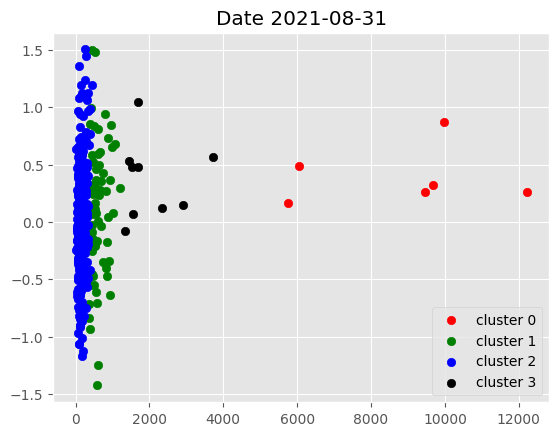

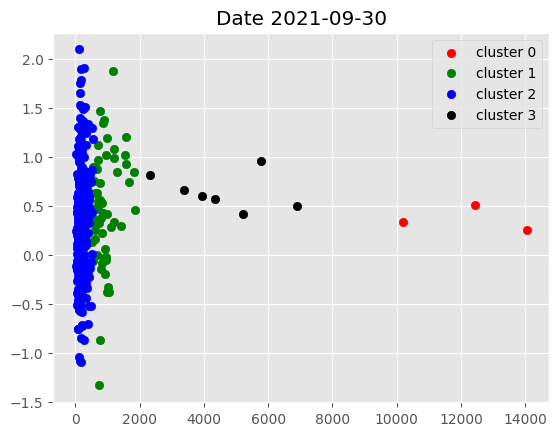

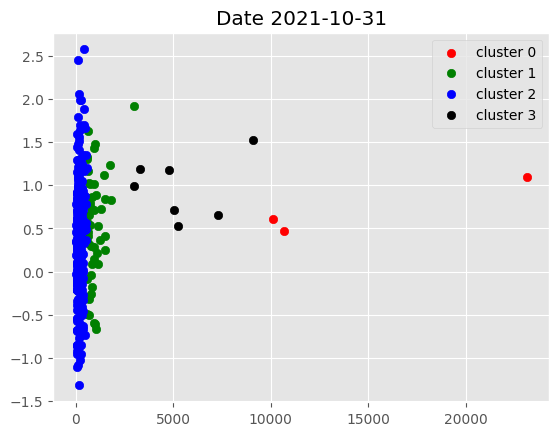

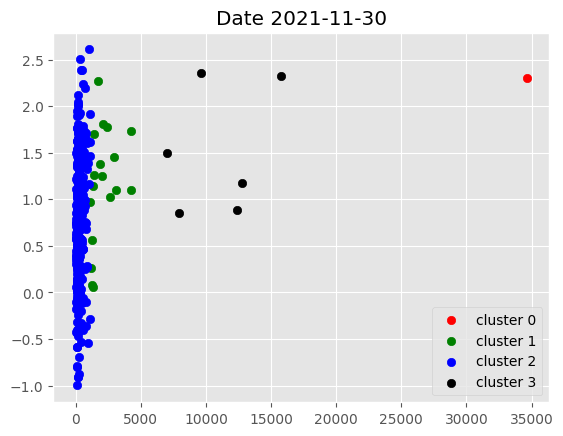

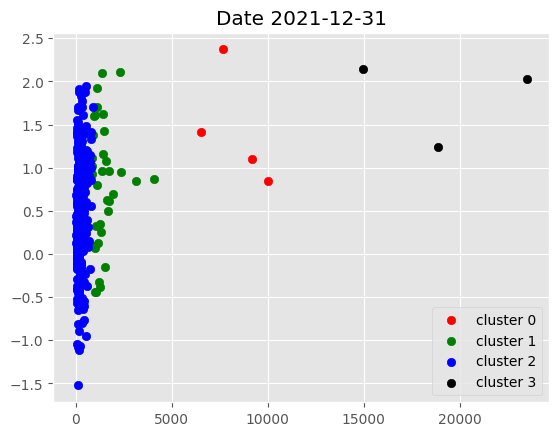

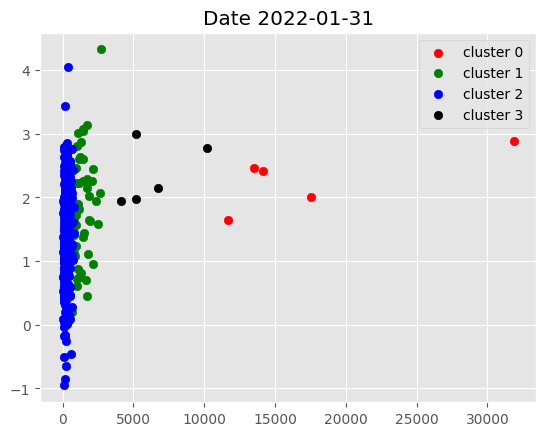

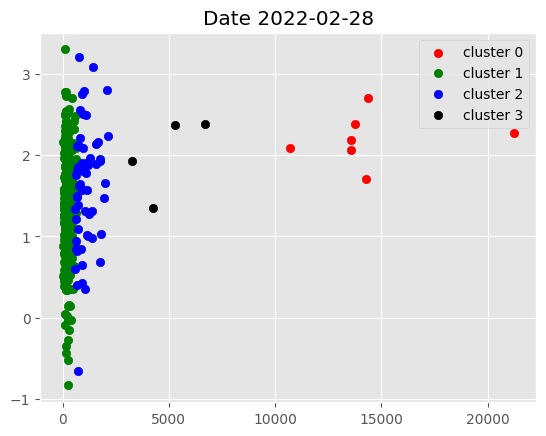

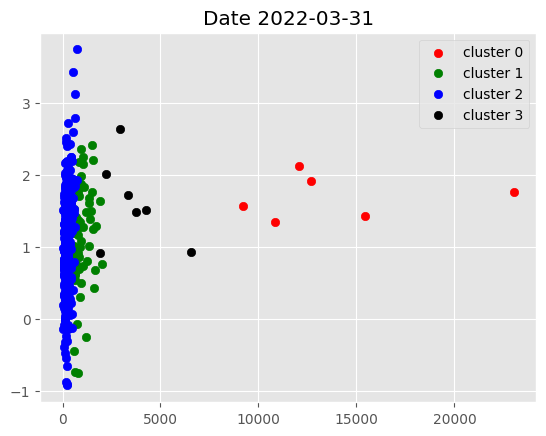

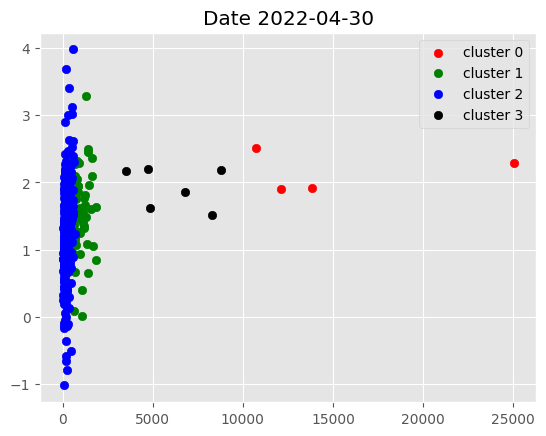

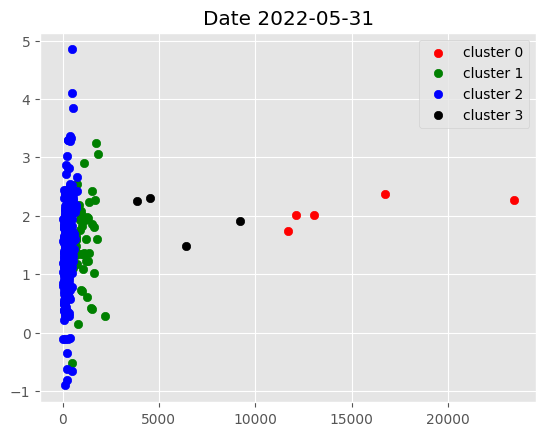

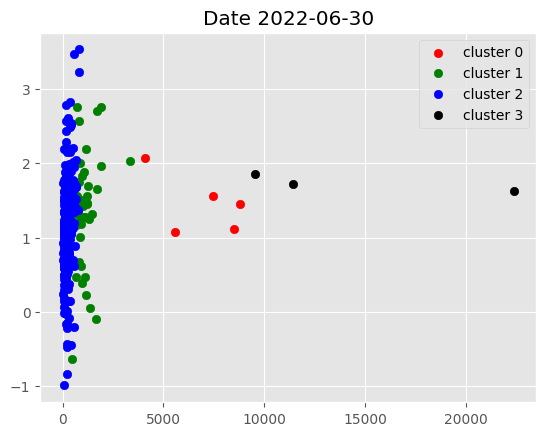

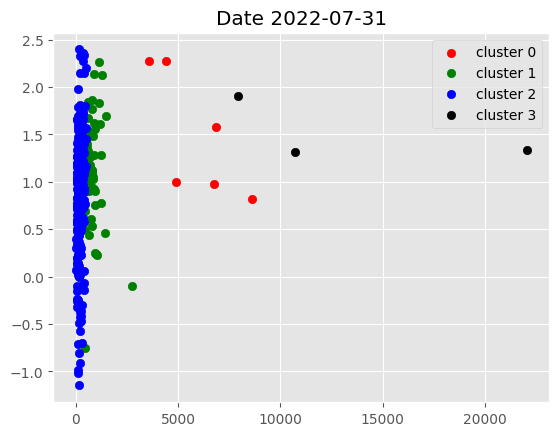

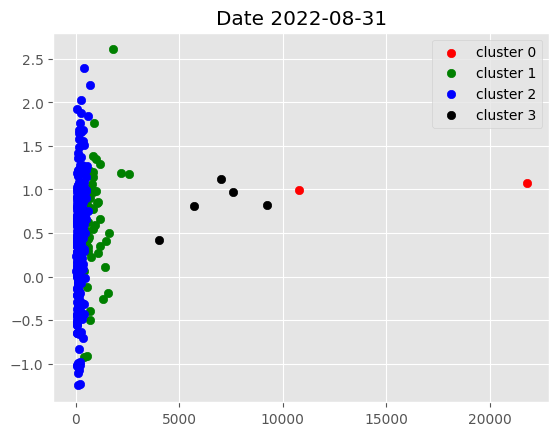

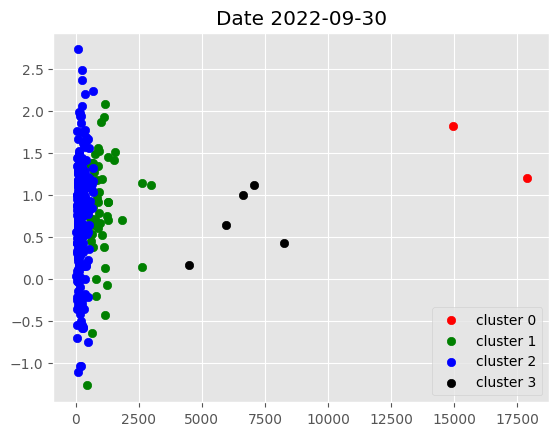

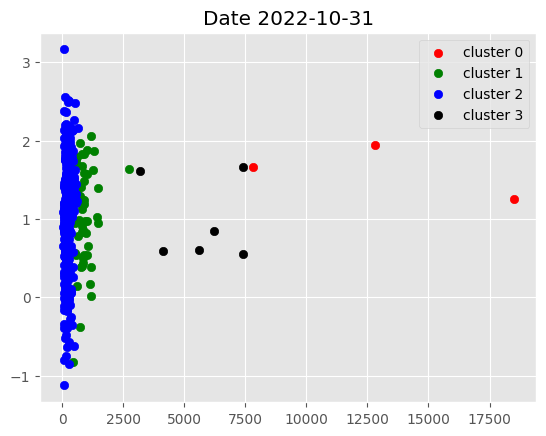

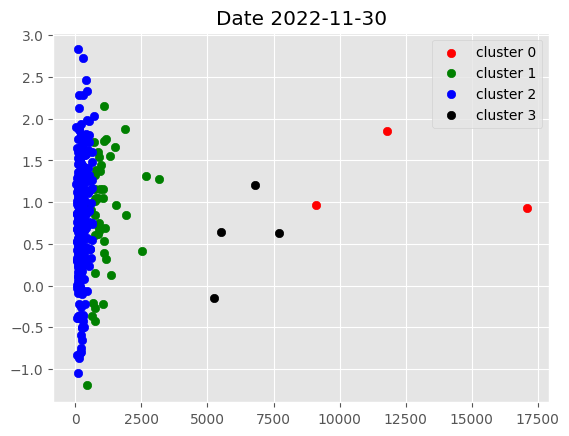

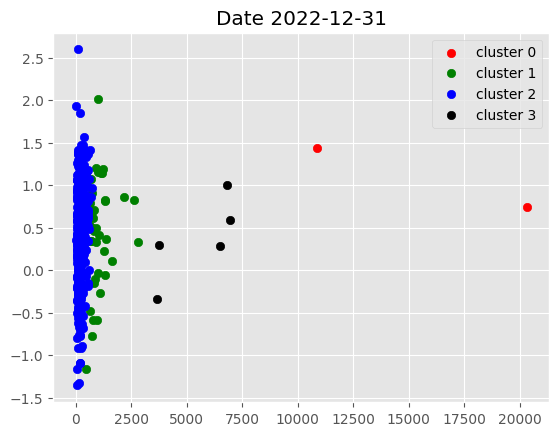

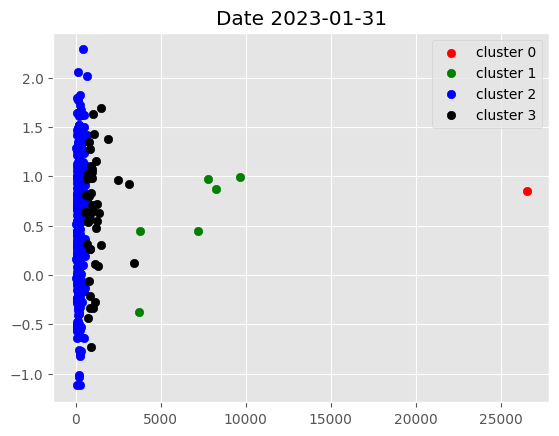

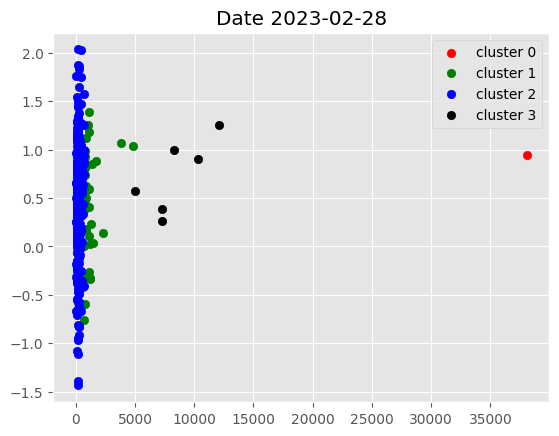

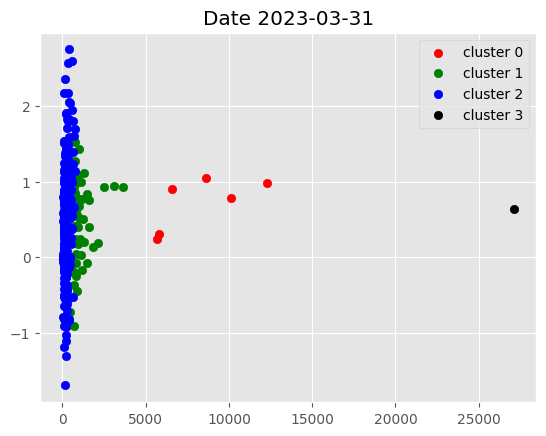

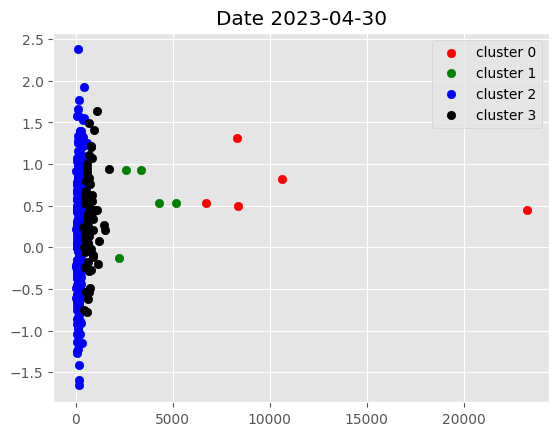

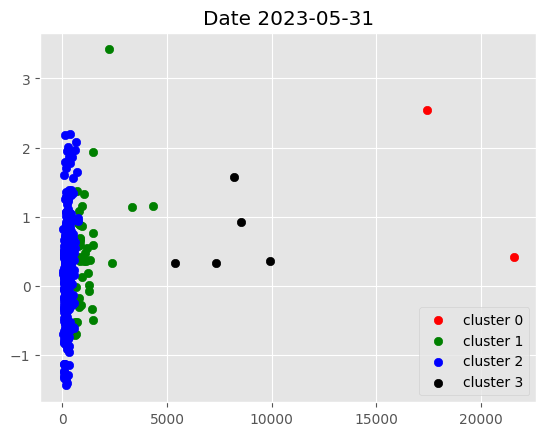

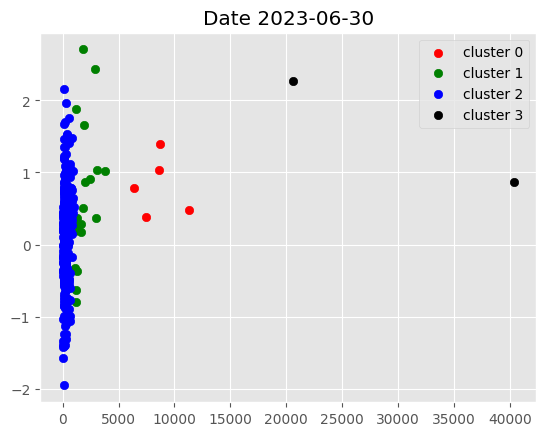

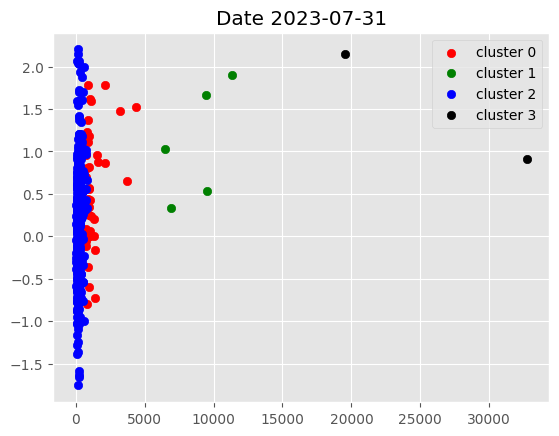

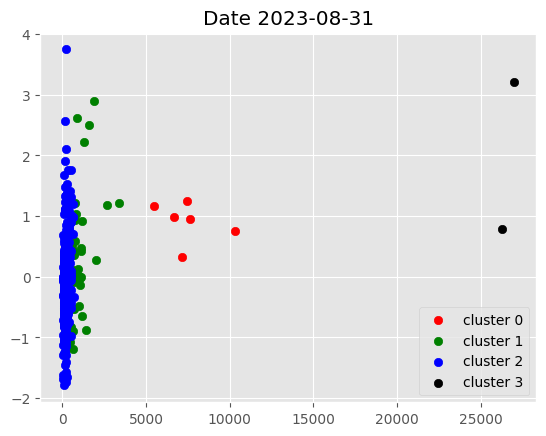

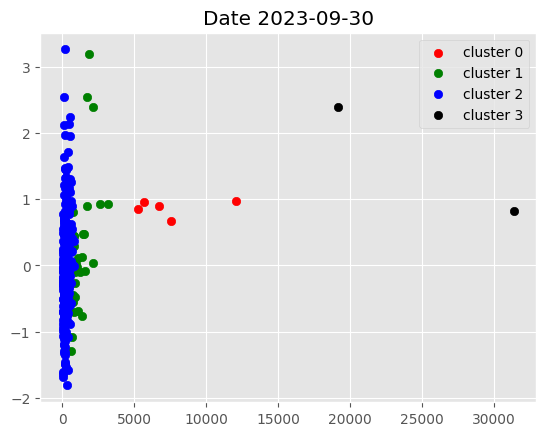

In [46]:
plt.style.use('ggplot')

for i in data.index.get_level_values('date').unique().to_list():
    g = data.xs(i, level=0)
    plt.title(f'Date {i}')
    plot_clusters(g)

## **Apply Pre-Defined Centroids**

In [47]:
target_rsi_values = [30, 45, 55, 70]
initial_centroids = np.zeros((len(target_rsi_values), 18))
initial_centroids[:, 6] = target_rsi_values

## **7. For each month select asset based on the cluster on the cluster and form a portfolio based on efficient frontier max sharpe ratio optimization**

In [53]:
filtered_df.index = pd.to_datetime(filtered_df.index)
filtered_df.index

DatetimeIndex(['2020-10-31', '2020-10-31', '2020-10-31', '2020-10-31',
               '2020-10-31', '2020-10-31', '2020-10-31', '2020-10-31',
               '2020-10-31', '2020-10-31',
               ...
               '2023-05-31', '2023-05-31', '2023-06-30', '2023-06-30',
               '2023-07-31', '2023-07-31', '2023-08-31', '2023-08-31',
               '2023-09-30', '2023-09-30'],
              dtype='datetime64[ns]', name='date', length=2841, freq=None)

In [56]:
filtered_df = data[data['cluster']==3].copy()
filtered_df = filtered_df.reset_index(level=1)
filtered_df.index = pd.to_datetime(filtered_df.index)
filtered_df.index = filtered_df.index+pd.DateOffset(1)
filtered_df = filtered_df.reset_index().set_index(['date', 'ticker'])
dates = filtered_df.index.get_level_values('date').unique().tolist()
fixed_dates = {}

for d in dates:
    fixed_dates[d.strftime('%Y-%m-%d')]= filtered_df.xs(d, level=0).index.tolist()
fixed_dates

{'2020-11-01': ['A',
  'ACGL',
  'ACN',
  'ADI',
  'ADM',
  'ADP',
  'ADSK',
  'AEE',
  'AEP',
  'AES',
  'AFL',
  'AIZ',
  'AKAM',
  'ALB',
  'ALGN',
  'ALL',
  'ALLE',
  'AMCR',
  'AME',
  'AMT',
  'AON',
  'APD',
  'APH',
  'APTV',
  'ATO',
  'AVB',
  'AXON',
  'AXP',
  'AZO',
  'BALL',
  'BAX',
  'BBY',
  'BDX',
  'BEN',
  'BG',
  'BIIB',
  'BKR',
  'BLDR',
  'BR',
  'BRO',
  'BSX',
  'BX',
  'BXP',
  'CAG',
  'CAH',
  'CB',
  'CBOE',
  'CDNS',
  'CDW',
  'CF',
  'CFG',
  'CHD',
  'CHRW',
  'CINF',
  'CLX',
  'CMI',
  'CMS',
  'CNC',
  'COF',
  'CPAY',
  'CPB',
  'CPRT',
  'CRL',
  'CSGP',
  'CTAS',
  'CTLT',
  'CTRA',
  'CTSH',
  'CZR',
  'D',
  'DD',
  'DE',
  'DECK',
  'DFS',
  'DG',
  'DGX',
  'DHI',
  'DLR',
  'DLTR',
  'DOC',
  'DOV',
  'DPZ',
  'DRI',
  'DTE',
  'DUK',
  'DVA',
  'DVN',
  'DXCM',
  'EBAY',
  'ECL',
  'ED',
  'EFX',
  'EG',
  'EIX',
  'EL',
  'ELV',
  'ENPH',
  'EOG',
  'EQIX',
  'EQR',
  'ERIE',
  'ES',
  'ESS',
  'ETN',
  'ETR',
  'EVRG',
  'EW',
  'EXC',
 

In [57]:
!pip install pyportfolioopt

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [264]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

def optimize_weights(prices, lower_bound=0):

    returns = expected_returns.mean_historical_return(prices=prices,
                                                    frequency=252)
    cov = risk_models.sample_cov(prices=prices,
                                frequency=252)
    ef = EfficientFrontier(expected_returns=returns,
                            cov_matrix=cov,
                            weight_bounds=(0, 1),
                            solver='SCS')
    
    weights = ef.max_sharpe()

    return ef.clean_weights()


* Download Fresh list only for shortlisted stocks

In [62]:
stocks = data.index.get_level_values('ticker').unique().tolist()

In [67]:
pd.to_datetime(data.index.get_level_values('date').unique())

DatetimeIndex(['2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31',
               '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31',
               '2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30',
               '2021-10-31', '2021-11-30', '2021-12-31', '2022-01-31',
               '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31',
               '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30',
               '2022-10-31', '2022-11-30', '2022-12-31', '2023-01-31',
               '2023-02-28', '2023-03-31', '2023-04-30', '2023-05-31',
               '2023-06-30', '2023-07-31', '2023-08-31', '2023-09-30'],
              dtype='datetime64[ns]', name='date', freq=None)

In [72]:
new_df = yf.download(tickers=stocks,
                    start = pd.to_datetime(data.index.get_level_values('date').unique()[0])-pd.DateOffset(months=12),
                    end= pd.to_datetime(data.index.get_level_values('date').unique()[-1]))
new_df

[*********************100%***********************]  379 of 379 completed


Price                       Adj Close                                     \
Ticker                              A        AAPL        ABBV        ABT   
Date                                                                       
2019-10-31 00:00:00+00:00   73.184921   60.111652   64.195099  76.628822   
2019-11-01 00:00:00+00:00   74.363617   61.817669   65.970451  75.758156   
2019-11-04 00:00:00+00:00   74.141380   62.223621   66.971092  75.354897   
2019-11-05 00:00:00+00:00   72.991692   62.134216   66.043098  75.464851   
2019-11-06 00:00:00+00:00   73.223579   62.160793   66.236763  76.179764   
...                               ...         ...         ...        ...   
2023-09-25 00:00:00+00:00  110.962349  174.991043  147.717545  95.036842   
2023-09-26 00:00:00+00:00  109.762909  170.896515  147.010712  93.827805   
2023-09-27 00:00:00+00:00  109.534927  169.375977  146.265671  93.145264   
2023-09-28 00:00:00+00:00  111.021812  169.634384  145.425125  95.670616   
2023-09-29 00:00:00+00:00  110.843391  170.151184  142.378128  94.432312   

Price                                                                     \
Ticker                          ACGL         ACN        ADBE         ADI   
Date                                                                       
2019-10-31 00:00:00+00:00  39.709522  172.285416  277.929993   96.858177   
2019-11-01 00:00:00+00:00  39.766575  174.887024  277.820007   99.347069   
2019-11-04 00:00:00+00:00  38.939297  174.496841  277.500000  101.181953   
2019-11-05 00:00:00+00:00  38.549427  173.641953  289.290009  103.053169   
2019-11-06 00:00:00+00:00  39.291126  175.825470  287.399994  101.763298   
...                              ...         ...         ...         ...   
2023-09-25 00:00:00+00:00  77.165421  310.686279  511.600006  171.694717   
2023-09-26 00:00:00+00:00  77.270020  304.433167  506.299988  168.670517   
2023-09-27 00:00:00+00:00  77.098854  308.128174  502.600006  169.130493   
2023-09-28 00:00:00+00:00  77.631355  294.788849  504.670013  172.653854   
2023-09-29 00:00:00+00:00  75.796120  301.002777  509.899994  171.361954   

Price                                             ...  Volume           \
Ticker                           ADM         ADP  ...     WST      WTW   
Date                                              ...                    
2019-10-31 00:00:00+00:00  36.456684  145.134781  ...  413900  1407000   
2019-11-01 00:00:00+00:00  36.794895  145.805725  ...  307000   663200   
2019-11-04 00:00:00+00:00  37.341225  144.821655  ...  358500   498400   
2019-11-05 00:00:00+00:00  37.263176  140.464783  ...  510100   562000   
2019-11-06 00:00:00+00:00  37.185143  142.835587  ...  546200   674200   
...                              ...         ...  ...     ...      ...   
2023-09-25 00:00:00+00:00  74.148140  233.448486  ...  201300   477500   
2023-09-26 00:00:00+00:00  72.968292  230.744598  ...  235500   993600   
2023-09-27 00:00:00+00:00  73.246475  235.987045  ...  295500   816600   
2023-09-28 00:00:00+00:00  72.939507  236.648376  ...  194800   677600   
2023-09-29 00:00:00+00:00  72.344788  233.993149  ...  228500   643500   

Price                                                                   \
Ticker                          WY     WYNN      XEL      XYL      YUM   
Date                                                                     
2019-10-31 00:00:00+00:00  3517800  1543700  8817200  2106700  3934100   
2019-11-01 00:00:00+00:00  2820100  1383800  2855800  2921300  2968600   
2019-11-04 00:00:00+00:00  3354900  2228900  3067900  1132800  3067900   
2019-11-05 00:00:00+00:00  4402100  1168000  4104300  1297800  2474000   
2019-11-06 00:00:00+00:00  3407300  2067300  5031400   962900  4237500   
...                            ...      ...      ...      ...      ...   
2023-09-25 00:00:00+00:00  2269600  1387800  3617800  1702000  1048500   
2023-09-26 00:00:00+00:00  3324700  1454000  6275500  1322400  1500600   
2023-09-27 00:00:00

* Calculate daily returns for each stocks which could land up in our portfolio
* Then loop over each month start, select the stocks for the month and calculate their weight for the next month
* if the maximum sharpe ratio optimization falls for a given month, apply equally weighted weights
* calculate each day portfolio return

In [276]:
# returns_dataframe = np.log(new_df['Adj Close']).diff()

portfolio_df = pd.DataFrame()

for start_date in fixed_dates.keys():
    try:
        end_date = (pd.to_datetime(start_date)+pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')
    
        cols = fixed_dates[start_date]
        # print(cols)
        optimization_start_date = (pd.to_datetime(start_date)-pd.DateOffset(months=12)).strftime('%Y-%m-%d')
        
        optimization_end_date = (pd.to_datetime(start_date)-pd.DateOffset(days=1)).strftime('%Y-%m-%d')
        
        new_df = new_df.sort_index()
        
        optimization_df = new_df.loc[optimization_start_date:optimization_end_date, 'Adj Close'][cols]
        
        success = False
        
        try:
            weights = optimize_weights(prices=optimization_df,
                                 lower_bound=(1/(len(optimization_df.columns)*2),2))
            
            weights = pd.DataFrame(weights, index=pd.Series(0))

            sucsess = True
        except:
            print(f'PRINT MAX SHARPE OPTIMIZATION for {start_date}, Continuing with Equal-Weight')

        if success == False:
            weight = pd.DataFrame([1/len(optimization_df.columns) for i in range(len(optimization_df.columns))],
                                  index=optimization_df.columns.tolist(),
                                  columns=pd.Series(0)).T
        
        temp_df = returns_dataframe[start_date:end_date]
    
        temp_df = temp_df.stack().to_frame('return').reset_index(level=0)\
           .merge(weights.stack().to_frame('weight').reset_index(level=0, drop=True),
                 left_index=True,
                 right_index=True)\
           .reset_index().rename(columns={"level_0": "Date", "Ticker": "index"}).set_index(['Date', 'index']).unstack().stack()
        
        temp_df.index.names = ['date', 'ticker']
    
        temp_df['weighted_return'] = temp_df['return'] * temp_df['weight']
    
        temp_df = temp_df.groupby(level=0)['weighted_return'].sum().to_frame('Strategy Return')
    
        portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)
    except Exception as e:
        print(e)
portfolio_df = portfolio_df.drop_duplicates()
portfolio_df

PRINT MAX SHARPE OPTIMIZATION for 2022-09-01, Continuing with Equal-Weight
PRINT MAX SHARPE OPTIMIZATION for 2022-10-01, Continuing with Equal-Weight
PRINT MAX SHARPE OPTIMIZATION for 2022-11-01, Continuing with Equal-Weight
PRINT MAX SHARPE OPTIMIZATION for 2022-12-01, Continuing with Equal-Weight
PRINT MAX SHARPE OPTIMIZATION for 2023-01-01, Continuing with Equal-Weight
PRINT MAX SHARPE OPTIMIZATION for 2023-03-01, Continuing with Equal-Weight
PRINT MAX SHARPE OPTIMIZATION for 2023-04-01, Continuing with Equal-Weight
'return'


,Strategy Return
date,
2020-11-02,0.030613
2020-11-03,0.010088
2020-11-04,0.012938
2020-11-05,0.057921
2020-11-06,0.016369
...,...
2023-09-25,0.014601
2023-09-26,-0.007393
2023-09-27,0.013203


<Axes: xlabel='date'>

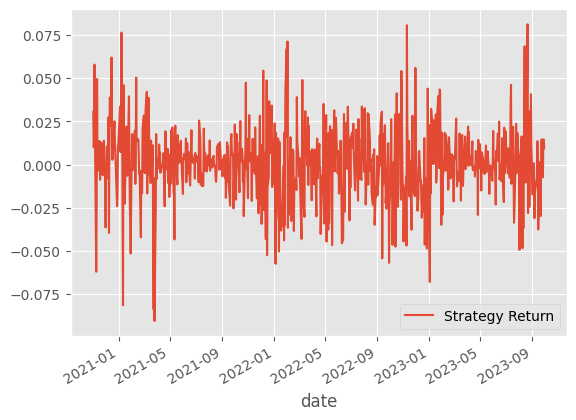

In [275]:
portfolio_df.plot()

In [250]:
# start_date
# (1/(len(optimization_df.columns)*2),2)
# optimization_df.columns
print(optimization_start_date)
print(optimization_end_date)

2019-11-01
2020-10-31


<Axes: xlabel='date'>

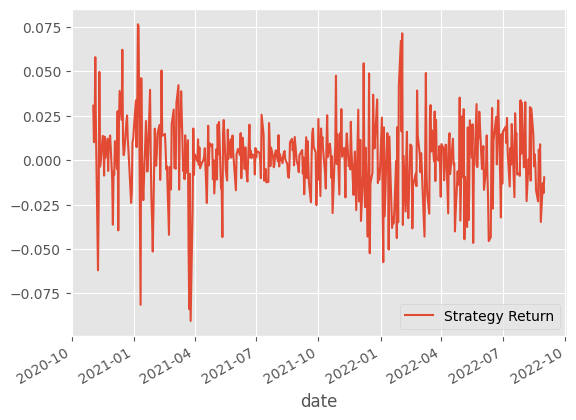

In [269]:
# new_df['2020-11-01':'2022-11-01']
portfolio_df.plot()

In [273]:
pd.DataFrame([1/len(optimization_df.columns) for i in range(len(optimization_df.columns))],
            index=optimization_df.columns.tolist(),
            columns=pd.Series(0)).T

,NVDA,TSLA
0,0.5,0.5


In [213]:
# temp_df = returns_dataframe[start_date:end_date]
temp_df 

Ticker,A,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,...,WST,WTW,WY,WYNN,XEL,XYL,YUM,ZBH,ZBRA,ZTS
2020-11-02,0.030389,-0.000827,0.036347,0.022298,0.037679,0.015008,-0.004843,-0.000422,0.048955,0.021916,...,-0.002466,-0.016075,0.029961,0.046137,0.024682,0.016503,0.020363,0.003174,0.032706,0.027005
2020-11-03,0.016866,0.015237,-0.003292,0.019167,0.017067,0.024760,0.020202,0.010662,-0.013685,0.030618,...,0.020532,0.005221,0.009556,-0.017019,0.016580,0.033521,0.015832,0.028932,0.085469,0.001534
2020-11-04,0.013549,0.040025,0.071718,0.017821,0.002191,0.009744,0.070595,0.050399,-0.029448,-0.011478,...,0.045031,0.020507,0.003165,0.020573,-0.003569,-0.051322,0.018532,0.002855,0.030724,0.066456
2020-11-05,0.016908,0.034878,-0.008608,0.017773,-0.002191,0.026284,0.018787,0.034801,0.029657,-0.011427,...,0.017886,0.013316,0.011173,0.051339,0.013793,0.045503,0.021277,0.018469,0.032694,-0.019986
2020-11-06,0.019743,-0.001137,-0.009006,0.007809,-0.011346,0.009781,-0.003713,0.023495,0.007486,0.021403,...,0.002641,0.028770,-0.018220,-0.000749,-0.005713,0.002859,-0.013195,-0.005974,0.018382,-0.009702
2020-11-09,-0.000356,-0.020170,0.024154,-0.044957,0.087645,0.016495,-0.048655,0.017229,0.020911,0.021779,...,-0.031231,0.019734,-0.004963,0.244422,0.001636,0.026544,0.025826,0.118520,0.017965,-0.024220
2020-11-10,-0.020656,-0.003013,0.038667,0.012898,0.022395,-0.006305,-0.041473,-0.007687,0.017297,0.006921,...,-0.025162,0.030202,-0.012876,-0.056123,0.004077,0.016752,0.009855,-0.037834,-0.022044,-0.016110
2020-11-11,-0.007195,0.029901,-0.007309,0.016469,-0.014010,0.016783,0.034252,0.019107,-0.001197,0.004665,...,0.020018,0.004643,0.021720,-0.052568,0.012937,-0.013869,-0.011425,-0.005074,0.032086,0.014595
2020-11-12,0.000274,-0.002346,-0.005620,-0.006233,-0.029216,-0.019131,-0.011114,-0.013927,-0.015289,-0.014298,...,0.015731,-0.003702,-0.022801,-0.056524,-0.012530,-0.015471,-0.013845,-0.006514,-0.044452,0.001454
2020-11-13,0.006648,0.000420,0.014646,0.005790,0.012375,0.015127,0.014508,0.005814,0.010687,0.012901,...,0.004754,0.022543,0.048876,0.061744,0.004329,0.028078,0.024104,0.019547,0.014797,0.003565


In [230]:
temp_df = temp_df.stack().to_frame('return').reset_index(level=0)\
       .merge(weights.stack().to_frame('weight').reset_index(level=0, drop=True),
             left_index=True,
             right_index=True)\
       .reset_index().rename(columns={"level_0": "Date", "Ticker": "index"}).set_index(['Date', 'index']).unstack().stack()

In [232]:
temp_df['weighted_return'] = temp_df['return'] * temp_df['weight']
temp_df

return  weight  weighted_return
Date       index                                   
2020-11-02 NVDA   0.003723     0.0         0.000000
           TSLA   0.031630     1.0         0.031630
2020-11-03 NVDA   0.034281     0.0         0.000000
           TSLA   0.056759     1.0         0.056759
2020-11-04 NVDA   0.057804     0.0         0.000000
           TSLA  -0.006912     1.0        -0.006912
2020-11-05 NVDA   0.026169     0.0         0.000000
           TSLA   0.039839     1.0         0.039839
2020-11-06 NVDA   0.027994     0.0         0.000000
           TSLA  -0.018755     1.0        -0.018755
2020-11-09 NVDA  -0.066087     0.0        -0.000000
           TSLA  -0.020419     1.0        -0.020419
2020-11-10 NVDA  -0.065230     0.0        -0.000000
           TSLA  -0.026215     1.0        -0.026215
2020-11-11 NVDA   0.049498     0.0         0.000000
           TSLA   0.016363     1.0         0.016363
2020-11-12 NVDA   0.002884     0.0         0.000000
           TSLA  -0.012957     1.0        -0.012957
2020-11-13 NVDA  -0.011942     0.0        -0.000000
           TSLA  -0.007949     1.0        -0.007949
2020-11-16 NVDA   0.016280     0.0         0.000000
           TSLA  -0.001004     1.0        -0.001004
2020-11-17 NVDA  -0.006905     0.0        -0.000000
           TSLA   0.078939     1.0         0.078939
2020-11-18 NVDA   0.000484     0.0         0.000000
           TSLA   0.097097     1.0         0.097097
2020-11-19 NVDA   0.000856     0.0         0.000000
           TSLA   0.025622     1.0         0.025622
2020-11-20 NVDA  -0.026577     0.0        -0.000000
           TSLA  -0.019538     1.0        -0.019538
2020-11-23 NVDA   0.003984     0.0         0.000000
           TSLA   0.063771     1.0         0.063771
2020-11-24 NVDA  -0.013967     0.0        -0.000000
           TSLA   0.062272     1.0         0.062272
2020-11-25 NVDA   0.021152     0.0         0.000000
           TSLA   0.032977     1.0         0.032977
2020-11-27 NVDA   0.002000     0.0         0.000000
           TSLA   0.020281     1.0         0.020281
2020-11-30 NVDA   0.010521     0.0         0.000000
           TSLA  -0.031493     1.0        -0.031493

In [233]:
temp_df = temp_df.groupby(level=0)['weighted_return'].sum().to_frame('Strategy Return')

Date
2020-11-02    0.031630
2020-11-03    0.056759
2020-11-04   -0.006912
2020-11-05    0.039839
2020-11-06   -0.018755
2020-11-09   -0.020419
2020-11-10   -0.026215
2020-11-11    0.016363
2020-11-12   -0.012957
2020-11-13   -0.007949
2020-11-16   -0.001004
2020-11-17    0.078939
2020-11-18    0.097097
2020-11-19    0.025622
2020-11-20   -0.019538
2020-11-23    0.063771
2020-11-24    0.062272
2020-11-25    0.032977
2020-11-27    0.020281
2020-11-30   -0.031493
Name: weighted_return, dtype: float64

In [ ]:
portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)

In [219]:
# weights = optimize_weights(prices=optimization_df,
#                          lower_bound=(1/(len(optimization_df.columns)*2),2))

weights.stack().to_frame('weight').reset_index(level=0, drop=True)

,weight
NVDA,0.0
TSLA,1.0


In [186]:
# new_df.index = new_df.index.date 
new_df.index = pd.to_datetime(new_df.index)
new_df.index.dtype

dtype('<M8[ns]')

In [188]:
new_df.loc['2019-10-31']
new_df.loc['2023-09-05']

Price      Ticker
Adj Close  A         1.176930e+02
           AAPL      1.885268e+02
           ABBV      1.395508e+02
           ABT       9.836171e+01
           ACGL      7.213516e+01
                         ...     
Volume     XYL       2.679700e+06
           YUM       1.435900e+06
           ZBH       1.645000e+06
           ZBRA      4.173000e+05
           ZTS       1.673000e+06
Name: 2023-09-05 00:00:00, Length: 2274, dtype: float64

In [179]:
cols = ['ABBV', 'CVX', 'HUM', 'UNH', 'VLO']

In [246]:
new_df = new_df.sort_index()
optimization_df = new_df.loc['2019-11-01':'2020-10-30']
optimization_df

Price        Adj Close                                                \
Ticker               A        AAPL       ABBV         ABT       ACGL   
2019-11-01   74.363617   61.817669  65.970451   75.758156  39.766575   
2019-11-04   74.141380   62.223621  66.971092   75.354897  38.939297   
2019-11-05   72.991692   62.134216  66.043098   75.464851  38.549427   
2019-11-06   73.223579   62.160793  66.236763   76.179764  39.291126   
2019-11-07   73.339500   62.878208  66.180267   76.427208  38.473354   
...                ...         ...        ...         ...        ...   
2020-10-26  101.954979  112.308472  71.470619  101.473808  28.983387   
2020-10-27  103.328949  113.821533  70.440132  101.082832  27.775745   
2020-10-28   99.060928  108.550186  68.549446   99.071960  28.003962   
2020-10-29   99.411705  112.572021  68.702744   97.750008  28.935843   
2020-10-30   99.479919  106.265961  72.475555   97.852409  28.726645   

Price                                                                  ...  \
Ticker             ACN        ADBE         ADI        ADM         ADP  ...   
2019-11-01  174.887024  277.820007   99.347069  36.794895  145.805725  ...   
2019-11-04  174.496841  277.500000  101.181953  37.341225  144.821655  ...   
2019-11-05  173.641953  289.290009  103.053169  37.263176  140.464783  ...   
2019-11-06  175.825470  287.399994  101.763298  37.185143  142.835587  ...   
2019-11-07  175.695419  290.769989  101.999466  37.757477  145.018478  ...   
...                ...         ...         ...        ...         ...  ...   
2020-10-26  206.970413  475.200012  112.333435  45.937931  133.593521  ...   
2020-10-27  208.320465  478.559998  111.554436  45.193100  133.831787  ...   
2020-10-28  201.976273  456.970001  108.011856  44.439274  142.125839  ...   
2020-10-29  204.336441  461.109985  109.875885  44.798241  144.976074  ...   
2020-10-30  204.780167  447.100006  109.922249  41.495808  144.765213  ...   

Price       Volume                                                        \
Ticker         WST      WTW       WY     WYNN      XEL      XYL      YUM   
2019-11-01  307000   663200  2820100  1383800  2855800  2921300  2968600   
2019-11-04  358500   498400  3354900  2228900  3067900  1132800  3067900   
2019-11-05  510100   562000  4402100  1168000  4104300  1297800  2474000   
2019-11-06  546200   674200  3407300  2067300  5031400   962900  4237500   
2019-11-07  275900   491000  3621500  3107500  4887600   794500  2632700   
...            ...      ...      ...      ...      ...      ...      ...   
2020-10-26  387900   730200  4065300  2959400  1695100   486400  1300000   
2020-10-27  416200   410500  3098900  2438200  2564800   736400  1024800   
2020-10-28  495600   879500  5201400  4421100  2679500   950600  1564600   
2020-10-29  316900  1053100  4253000  3936700  3221400  1265800  2009000   
2020-10-30  439100  1144300  6824300  3303900  2393900   851700  2139000   

Price                                 
Ticker          ZBH    ZBRA      ZTS  
2019-11-01   895379  453500  2466200  
2019-11-04  1741833  832200  1918800  
2019-11-05  2720848  604300  4492000  
2019-11-06  1504109  410000  3509800  
2019-11-07  1243931  377400  3945400  
...             ...     ...      ...  
2020-10-26  1672205  250800  1151600  
2020-10-27  1031030  351600  1851000  
2020-10-28  1824130  300200  2160700  
2020-10-29  1638936  263000  1539000  
2020-10-30  1294092  304300  2078300  

[252 rows x 2274 columns]

In [194]:
optimization_df

Ticker,NVDA,TSLA
2019-11-01,5.039886,20.887333
2019-11-04,5.236666,21.164667
2019-11-05,5.214525,21.148001
2019-11-06,5.165269,21.771999
2019-11-07,5.182931,22.369333
...,...,...
2020-10-26,13.104111,140.093338
2020-10-27,13.358891,141.559998
2020-10-28,12.591314,135.339996
2020-10-29,12.987190,136.943329


In [280]:
spy = yf.download(tickers='SPY',
                       start='2015-01-01',
                       end=dt.date.today())

spy_ret = np.log(spy[['Adj Close']]).diff().dropna().rename({'Adj Close': 'SPY Buy&Hold'}, axis=1)

portfolio_df = portfolio_df.merge(spy_ret,
                                 left_index=True,
                                 right_index=True)
portfolio_df

[*********************100%***********************]  1 of 1 completed


,Strategy Return,SPY Buy&Hold
2020-11-02,0.030613,0.011146
2020-11-03,0.010088,0.017502
2020-11-04,0.012938,0.022103
2020-11-05,0.057921,0.019315
2020-11-06,0.016369,-0.000228
...,...,...
2023-09-25,0.014601,0.004196
2023-09-26,-0.007393,-0.014800
2023-09-27,0.013203,0.000399
2023-09-28,0.014517,0.005781


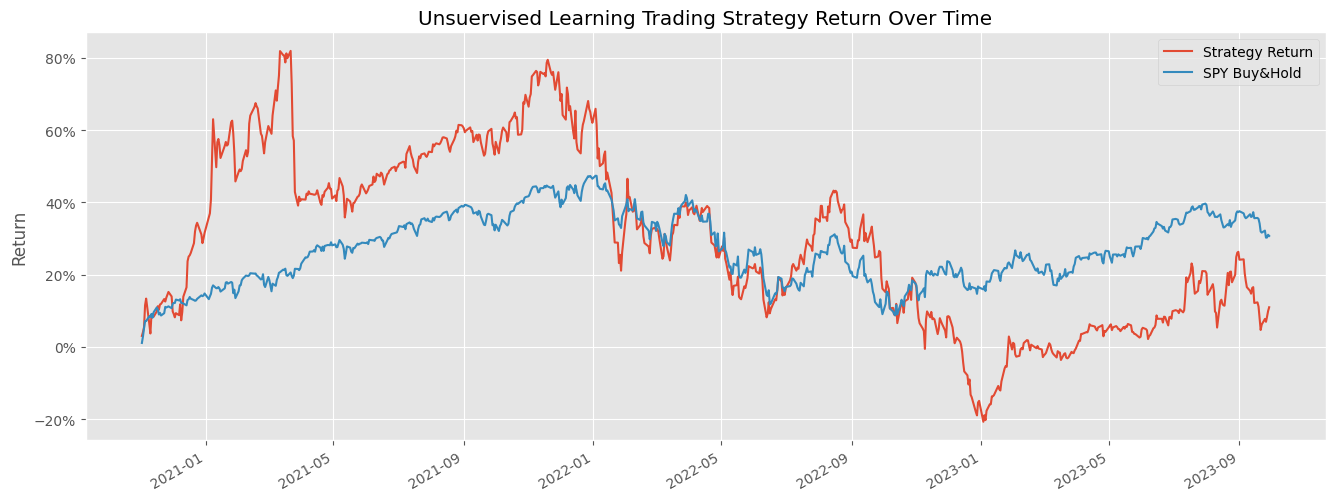

In [290]:
import matplotlib.ticker as mtick

plt.style.use('ggplot')

portfolio_cummulative_return = np.exp(np.log1p(portfolio_df).cumsum())-1

portfolio_cummulative_return[:'2023-09-29'].plot(figsize=(16,6))

plt.title('Unsuervised Learning Trading Strategy Return Over Time')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('Return')

plt.show()

In [287]:
portfolio_cummulative_return.loc['2023-09-29']

Strategy Return    0.109890
SPY Buy&Hold       0.307204
Name: 2023-09-29 00:00:00, dtype: float64

# **TWITTER SENTIMENT INVESTING STRATEGY**
1. Load Twitter Sentiment Data
* Load the twitter sentiment set the index, calculate engagement ratio and and other stocks with no significant twittwer activity

In [341]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import yfinance as yf
import os

sentiment_df = pd.read_csv("C:/Users/user/Downloads/sentiment_data.csv")
sentiment_df['Date'] = pd.to_datetime(sentiment_df['date'])
sentiment_df = sentiment_df.set_index(['Date', 'symbol'])
sentiment_df['engagement_ratio'] = sentiment_df['twitterComments'] / sentiment_df['twitterLikes'] 
sentiment_df = sentiment_df[(sentiment_df['twitterComments']>20) & (sentiment_df['twitterLikes']>10)]
sentiment_df

date  twitterPosts  twitterComments  twitterLikes  \
Date       symbol                                                            
2021-11-18 AAPL    2021-11-18         811.0           2592.0       21674.0   
           AMD     2021-11-18         150.0            675.0        2949.0   
           AMZN    2021-11-18         557.0           1315.0       12969.0   
           ATVI    2021-11-18          82.0             36.0         131.0   
           BA      2021-11-18          61.0             55.0         342.0   
...                       ...           ...              ...           ...   
2023-01-04 T       2023-01-04         184.0           3409.0       14271.0   
           TSLA    2023-01-04        6767.0         540711.0     3810688.0   
           TSN     2023-01-04          35.0            168.0         460.0   
           V       2023-01-04         132.0           1008.0        5943.0   
           XOM     2023-01-04         212.0            374.0        2071.0   

                   twitterImpressions  twitterSentiment  engagement_ratio  
Date       symbol                                                          
2021-11-18 AAPL             7981808.0               NaN          0.119590  
           AMD              1645270.0               NaN          0.228891  
           AMZN             5590695.0               NaN          0.101396  
           ATVI             1310715.0               NaN          0.274809  
           BA                425847.0               NaN          0.160819  
...                               ...               ...               ...  
2023-01-04 T                 884935.0          0.590457          0.238876  
           TSLA            55464921.0          0.543057          0.141893  
           TSN                57207.0          0.561900          0.365217  
           V                 139835.0          0.567286          0.169611  
           XOM               483389.0          0.588914          0.180589  

[24325 rows x 7 columns]

# 2. Aggregate Monthly and calculate average sentiment for the month
* Aggregate on a monthly level and calculate average monthly metric, for the one we choose.

In [342]:
aggregated_df = (sentiment_df.reset_index('symbol').groupby([pd.Grouper(freq='M'), 'symbol'])
                 [['engagement_ratio']].mean())

aggregated_df['rank'] = (aggregated_df.groupby(level=0)['engagement_ratio']
                         .transform(lambda x: x.rank(ascending=False)))
aggregated_df

engagement_ratio  rank
Date       symbol                        
2021-11-30 AAL             0.213676  38.0
           AAPL            0.256318  24.0
           ABBV            0.267943  20.0
           ABT             0.235784  27.0
           AES             0.864613   3.0
...                             ...   ...
2023-01-31 TMO             0.333313  20.0
           TSLA            0.151992  72.0
           TSN             0.280553  31.0
           V               0.194045  61.0
           XOM             0.217904  53.0

[1103 rows x 2 columns]

# **3. Select Top 5 Stocks based on their Cross-sectional Ranking**
* Select Top 5 stocks by rank for each month and fix the date at the beginning of the next month

In [343]:
filtered_df = aggregated_df[aggregated_df['rank']<6]

filtered_df.reset_index(level=1, inplace=True)
filtered_df.index = filtered_df.index+pd.DateOffset(1)
filtered_df = filtered_df.reset_index().set_index(['Date', 'symbol'])
filtered_df.head(20)

engagement_ratio  rank
Date       symbol                        
2021-12-01 AES             0.864613   3.0
           GILD            1.033918   2.0
           MNST            0.699721   4.0
           OXY             2.147741   1.0
           SLB             0.647374   5.0
2022-01-01 FCX             0.841220   5.0
           ILMN            1.255583   3.0
           L               6.507246   1.0
           LUV             1.353563   2.0
           MA              0.883401   4.0
2022-02-01 AES             1.084746   2.0
           AMD             0.715556   5.0
           D               1.525919   1.0
           LUV             1.035258   3.0
           MA              0.729063   4.0
2022-03-01 D               0.539383   5.0
           FCX             1.138332   2.0
           LUV             1.574377   1.0
           MRO             0.592924   4.0
           OXY             1.025579   3.0

# 4. Extract the stocks to form portfolios with at the start of each new month
* Create a dictionary containing start of the month and corresponding selected stocks.

In [344]:
dates = filtered_df.index.get_level_values('Date').unique().tolist()
fixed_dates = {}
for d in dates:
    fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d, level=0).index.tolist()
    
fixed_dates                                                                                 

{'2021-12-01': ['AES', 'GILD', 'MNST', 'OXY', 'SLB'],
 '2022-01-01': ['FCX', 'ILMN', 'L', 'LUV', 'MA'],
 '2022-02-01': ['AES', 'AMD', 'D', 'LUV', 'MA'],
 '2022-03-01': ['D', 'FCX', 'LUV', 'MRO', 'OXY'],
 '2022-04-01': ['A', 'CRM', 'PFE', 'PM', 'STZ'],
 '2022-05-01': ['AMD', 'CRM', 'CVX', 'J', 'KEY'],
 '2022-06-01': ['AMD', 'DD', 'FCX', 'KEY', 'LMT'],
 '2022-07-01': ['CB', 'CRM', 'DD', 'STZ', 'TMO'],
 '2022-08-01': ['A', 'DD', 'JPM', 'REGN', 'STZ'],
 '2022-09-01': ['ABT', 'AEP', 'L', 'META', 'MRNA'],
 '2022-10-01': ['AES', 'J', 'KEY', 'L', 'META'],
 '2022-11-01': ['A', 'DD', 'FCX', 'ILMN', 'META'],
 '2022-12-01': ['AEP', 'AES', 'DD', 'J', 'STZ'],
 '2023-01-01': ['A', 'AES', 'DAL', 'J', 'KEY'],
 '2023-02-01': ['AES', 'BIIB', 'FCX', 'L', 'MDT']}

# 5 Download Fresh stock prices for only secelcted /shortlisted stocks

In [373]:
stock_list = sentiment_df.index.get_level_values('symbol').unique().tolist()
price_df = yf.download(tickers=stock_list,
                      start='2021-01-01',
                      end='2023-03-01')


[*********************100%***********************]  85 of 85 completed

1 Failed download:
['ATVI']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


# Calculate Portfolio Returns with monthly balancing 

In [384]:
returns_df = np.log(price_df['Adj Close']).diff()
portfolio_df = pd.DataFrame()

for start_date in fixed_dates.keys():
    # print(start_date)
    end_date = (pd.to_datetime(start_date)+pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')
    
    cols = fixed_dates[start_date]
    temp_df = returns_df[start_date:end_date][cols].mean(axis=1).to_frame('portfolio_return')
    portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)

portfolio_df.index = portfolio_df.index.strftime('%Y-%m-%d')
portfolio_df

,portfolio_return
Date,
2021-12-01,-0.011779
2021-12-02,0.022261
2021-12-03,-0.005095
2021-12-06,0.019370
2021-12-07,0.023622
...,...
2023-02-22,-0.006454
2023-02-23,-0.008696
2023-02-24,-0.005402


In [387]:
qqq_df = yf.download(tickers='QQQ',
                    start='2021-01-01',
                    end='2023-03-01')

qqq_ret = np.log(qqq_df['Adj Close']).diff().to_frame('nasdaq_return')

portfolio_df = portfolio_df.merge(qqq_ret,
                                 left_index=True,
                                 right_index=True)

[*********************100%***********************]  1 of 1 completed


In [388]:
portfolio_df

,portfolio_return,nasdaq_return
Date,,
2021-12-01,-0.011779,-0.017159
2021-12-02,0.022261,0.007181
2021-12-03,-0.005095,-0.017542
2021-12-06,0.019370,0.007981
2021-12-07,0.023622,0.029669
...,...,...
2023-02-22,-0.006454,0.000748
2023-02-23,-0.008696,0.008696
2023-02-24,-0.005402,-0.016886


In [385]:
# portfolio_df.index = pd.to_datetime(portfolio_df.index)
# # qqq_ret

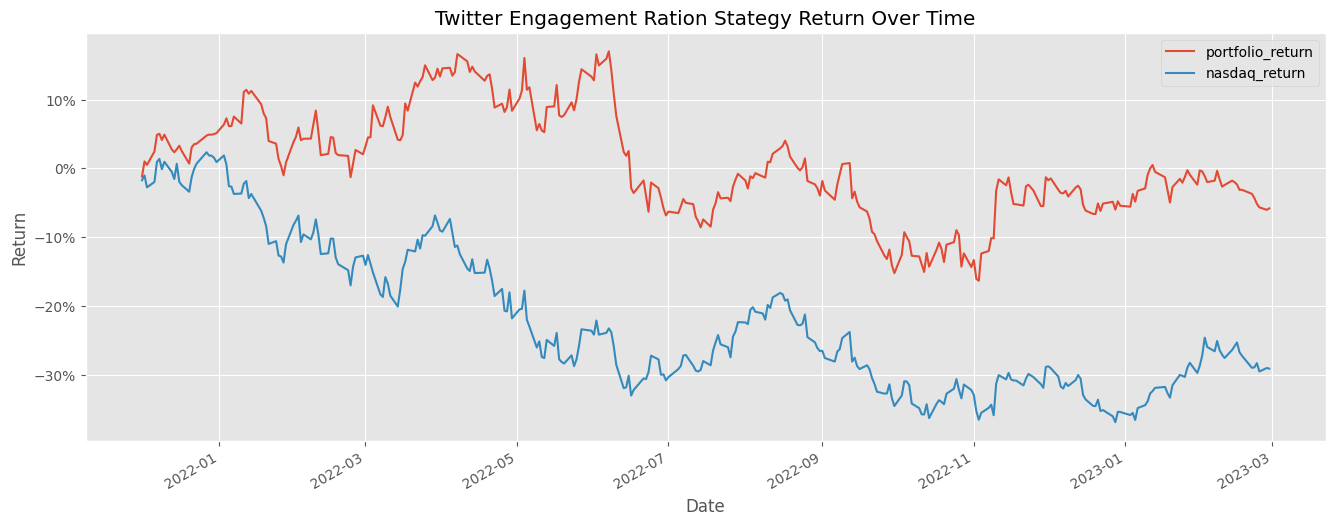

In [389]:
portfolio_cummulative_return = np.exp(np.log1p(portfolio_df).cumsum()).sub(1)
portfolio_cummulative_return.plot(figsize=(16,6))
plt.title('Twitter Engagement Ration Stategy Return Over Time')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.ylabel('Return')
plt.show()

# Intraday Strategy Using GARCH Model
* Using simulated daily data and intraday 5-min data
* Load Daily and 5-minuite data
* Define function to fit GARCH model on the daily data and predict 1-day ahead volatility in a rolling window
* Calculate prediction premium and form a daily signal from it
* Merge with interday data and calculate interday indicators to form the interday signal
* Generate the position entry and hold until the end of the day
* Calculate final strategy returns

# 1. Load Simulated Daily and Simulated 5-minuite data
   * we are loading both datasets, set the indexes and calculate daily log return

In [410]:
! pip install arch


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/926.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/926.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/926.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/926.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/926.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/926.2 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/926.2 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/926.2 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/926.2 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/926.2 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/926.2 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/926.2 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/926.2 kB

In [411]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import yfinance as yf
from arch import arch_model
import os

# daily_df = pd.read_csv('C:/Users/user/Downloads/Algorithmic_Trading_Machine_Learning-main/simulated_daily_data.csv')
# daily_df['Date'] = pd.to_datetime(daily_df['Date'])
# daily_df = daily_df.set_index('Date')
# daily_df['log_ret'] = np.log(daily_df['Adj Close']).diff()

interday_5min_df = pd.read_csv('C:/Users/user/Downloads/Algorithmic_Trading_Machine_Learning-main/simulated_5min_data.csv')
interday_5min_df['datetime'] = pd.to_datetime(interday_5min_df['datetime'])
interday_5min_df = interday_5min_df.set_index('datetime')
interday_5min_df

,open,low,high,close,volume,Unnamed: 6
datetime,,,,,,
2021-09-29 20:00:00,10379.7775,10364.5950,10398.7025,10370.9575,46,NaN
2021-09-29 20:05:00,10370.9425,10352.4175,10380.2500,10371.1450,53,NaN
2021-09-29 20:10:00,10372.8150,10357.8250,10388.7500,10384.3125,116,NaN
2021-09-29 20:15:00,10385.8275,10384.0825,10457.2000,10442.5175,266,NaN
2021-09-29 20:20:00,10442.5225,10426.2375,10448.0000,10440.9950,65,NaN
...,...,...,...,...,...,...
2023-09-20 10:40:00,6792.1025,6783.6000,6796.2500,6790.1375,41,NaN
2023-09-20 10:45:00,6790.5575,6779.1000,6795.7500,6781.9175,42,NaN
2023-09-20 10:50:00,6781.5475,6779.3750,6790.2500,6783.9050,44,NaN


# 2. Define the function to fit GARCH model and predict 1-day ahead volatility in a rolling window
* We are first calculating the rolling variance and then we are creating a function in a 6-month rolling window to fit a garch model and predict the next day variance

In [413]:
daily_df['variance'] = daily_df['log_ret'].rolling(180).var()
daily_df = daily_df['2020-01-01':]

def predict_volatility(x):
    best_model = arch_model(y=x,
                           p=1,
                           q=3,).fit(update_freq=5, disp='off')
    variance_forecast = best_model.forecast(horizon=1).variance.iloc[-1, 0]
    print(x.index[-1])
    return variance_forecast
    
    
daily_df['predictions'] = daily_df['log_ret'].rolling(100).apply(lambda x: predict_volatility(x))
daily_df
    

2020-04-09 00:00:00
2020-04-10 00:00:00
2020-04-11 00:00:00
2020-04-12 00:00:00
2020-04-13 00:00:00
2020-04-14 00:00:00
2020-04-15 00:00:00
2020-04-16 00:00:00
2020-04-17 00:00:00
2020-04-18 00:00:00
2020-04-19 00:00:00
2020-04-20 00:00:00
2020-04-21 00:00:00
2020-04-22 00:00:00
2020-04-23 00:00:00
2020-04-24 00:00:00
2020-04-25 00:00:00
2020-04-26 00:00:00
2020-04-27 00:00:00
2020-04-28 00:00:00
2020-04-29 00:00:00
2020-04-30 00:00:00
2020-05-01 00:00:00
2020-05-02 00:00:00
2020-05-03 00:00:00
2020-05-04 00:00:00
2020-05-05 00:00:00
2020-05-06 00:00:00
2020-05-07 00:00:00
2020-05-08 00:00:00
2020-05-09 00:00:00
2020-05-10 00:00:00
2020-05-11 00:00:00
2020-05-12 00:00:00
2020-05-13 00:00:00
2020-05-14 00:00:00
2020-05-15 00:00:00
2020-05-16 00:00:00
2020-05-17 00:00:00
2020-05-18 00:00:00
2020-05-19 00:00:00
2020-05-20 00:00:00
2020-05-21 00:00:00
2020-05-22 00:00:00
2020-05-23 00:00:00
2020-05-24 00:00:00
2020-05-25 00:00:00
2020-05-26 00:00:00
2020-05-27 00:00:00
2020-05-28 00:00:00


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


2020-12-31 00:00:00
2021-01-01 00:00:00
2021-01-02 00:00:00
2021-01-03 00:00:00
2021-01-04 00:00:00
2021-01-05 00:00:00
2021-01-06 00:00:00
2021-01-07 00:00:00
2021-01-08 00:00:00
2021-01-09 00:00:00
2021-01-10 00:00:00
2021-01-11 00:00:00
2021-01-12 00:00:00
2021-01-13 00:00:00
2021-01-14 00:00:00


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


2021-01-15 00:00:00
2021-01-16 00:00:00
2021-01-17 00:00:00
2021-01-18 00:00:00
2021-01-19 00:00:00
2021-01-20 00:00:00
2021-01-21 00:00:00
2021-01-22 00:00:00
2021-01-23 00:00:00
2021-01-24 00:00:00
2021-01-25 00:00:00
2021-01-26 00:00:00
2021-01-27 00:00:00
2021-01-28 00:00:00
2021-01-29 00:00:00
2021-01-30 00:00:00
2021-01-31 00:00:00
2021-02-01 00:00:00
2021-02-02 00:00:00
2021-02-03 00:00:00
2021-02-04 00:00:00
2021-02-05 00:00:00
2021-02-06 00:00:00
2021-02-07 00:00:00
2021-02-08 00:00:00
2021-02-09 00:00:00
2021-02-10 00:00:00
2021-02-11 00:00:00
2021-02-12 00:00:00
2021-02-13 00:00:00
2021-02-14 00:00:00
2021-02-15 00:00:00
2021-02-16 00:00:00
2021-02-17 00:00:00
2021-02-18 00:00:00
2021-02-19 00:00:00
2021-02-20 00:00:00
2021-02-21 00:00:00
2021-02-22 00:00:00
2021-02-23 00:00:00
2021-02-24 00:00:00
2021-02-25 00:00:00
2021-02-26 00:00:00
2021-02-27 00:00:00
2021-02-28 00:00:00
2021-03-01 00:00:00
2021-03-02 00:00:00
2021-03-03 00:00:00
2021-03-04 00:00:00
2021-03-05 00:00:00


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


2023-03-27 00:00:00
2023-03-28 00:00:00
2023-03-29 00:00:00
2023-03-30 00:00:00
2023-03-31 00:00:00
2023-04-01 00:00:00
2023-04-02 00:00:00
2023-04-03 00:00:00
2023-04-04 00:00:00
2023-04-05 00:00:00
2023-04-06 00:00:00
2023-04-07 00:00:00
2023-04-08 00:00:00
2023-04-09 00:00:00
2023-04-10 00:00:00
2023-04-11 00:00:00
2023-04-12 00:00:00
2023-04-13 00:00:00
2023-04-14 00:00:00
2023-04-15 00:00:00
2023-04-16 00:00:00
2023-04-17 00:00:00
2023-04-18 00:00:00
2023-04-19 00:00:00
2023-04-20 00:00:00
2023-04-21 00:00:00
2023-04-22 00:00:00
2023-04-23 00:00:00
2023-04-24 00:00:00
2023-04-25 00:00:00
2023-04-26 00:00:00
2023-04-27 00:00:00
2023-04-28 00:00:00
2023-04-29 00:00:00
2023-04-30 00:00:00
2023-05-01 00:00:00
2023-05-02 00:00:00
2023-05-03 00:00:00
2023-05-04 00:00:00
2023-05-05 00:00:00
2023-05-06 00:00:00
2023-05-07 00:00:00
2023-05-08 00:00:00
2023-05-09 00:00:00
2023-05-10 00:00:00
2023-05-11 00:00:00
2023-05-12 00:00:00
2023-05-13 00:00:00
2023-05-14 00:00:00
2023-05-15 00:00:00


,Open,High,Low,Close,Adj Close,Volume,Unnamed: 7,log_ret,variance,predictions
Date,,,,,,,,,,
2020-01-01,1798.723022,1813.582642,1793.736084,1800.043579,1800.043579,1.856566e+10,NaN,0.000914,NaN,NaN
2020-01-02,1800.637817,1803.038818,1733.817505,1746.367554,1746.367554,2.080208e+10,NaN,-0.030273,NaN,NaN
2020-01-03,1746.107178,1853.428833,1728.749023,1836.221069,1836.221069,2.811148e+10,NaN,0.050172,NaN,NaN
2020-01-04,1836.343872,1856.846436,1827.378540,1852.664185,1852.664185,1.844427e+10,NaN,0.008915,NaN,NaN
2020-01-05,1852.612915,1886.124268,1850.133911,1852.829346,1852.829346,1.972507e+10,NaN,0.000089,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-09-14,6557.069336,6693.655762,6542.862793,6634.918457,6634.918457,1.381136e+10,NaN,0.011801,0.000393,0.000283
2023-09-15,6633.454590,6710.124512,6560.175293,6652.173340,6652.173340,1.147974e+10,NaN,0.002597,0.000385,0.000196
2023-09-16,6651.549805,6688.692383,6618.472656,6642.070313,6642.070313,7.402031e+09,NaN,-0.001520,0.000384,0.000193


<Axes: xlabel='Date'>

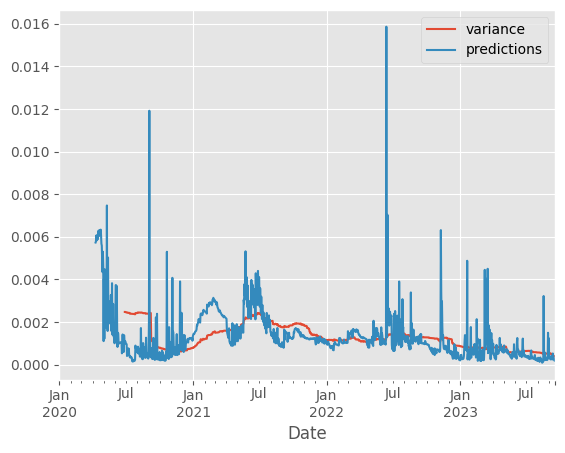

In [416]:
daily_df[['variance','predictions']].plot()

# 3. Calculate the Prediction Premium and form a daily signal from it.
* We are calculating the prediction premium. And calculate its 6-month rolling standard deviation.
* From this we are creating our daily Signal

In [419]:
daily_df['prediction_premiums'] = (daily_df['predictions']-daily_df['variance'])/daily_df['variance']
daily_df['premiums_std'] = daily_df['prediction_premiums'].rolling(180).std()
daily_df

,Open,High,Low,Close,Adj Close,Volume,Unnamed: 7,log_ret,variance,predictions,prediction_premiums,premiums_std
Date,,,,,,,,,,,,
2020-01-01,1798.723022,1813.582642,1793.736084,1800.043579,1800.043579,1.856566e+10,NaN,0.000914,NaN,NaN,NaN,NaN
2020-01-02,1800.637817,1803.038818,1733.817505,1746.367554,1746.367554,2.080208e+10,NaN,-0.030273,NaN,NaN,NaN,NaN
2020-01-03,1746.107178,1853.428833,1728.749023,1836.221069,1836.221069,2.811148e+10,NaN,0.050172,NaN,NaN,NaN,NaN
2020-01-04,1836.343872,1856.846436,1827.378540,1852.664185,1852.664185,1.844427e+10,NaN,0.008915,NaN,NaN,NaN,NaN
2020-01-05,1852.612915,1886.124268,1850.133911,1852.829346,1852.829346,1.972507e+10,NaN,0.000089,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-14,6557.069336,6693.655762,6542.862793,6634.918457,6634.918457,1.381136e+10,NaN,0.011801,0.000393,0.000283,-0.280250,0.584930
2023-09-15,6633.454590,6710.124512,6560.175293,6652.173340,6652.173340,1.147974e+10,NaN,0.002597,0.000385,0.000196,-0.490574,0.577199
2023-09-16,6651.549805,6688.692383,6618.472656,6642.070313,6642.070313,7.402031e+09,NaN,-0.001520,0.000384,0.000193,-0.498867,0.566440


In [426]:
# daily_df['premiums_std'].plot()
daily_df['signal_daily'] = daily_df.apply(lambda x: 1 if (x['prediction_premiums']>x['premiums_std']*1.5)
                                          else (-1 if (x['prediction_premiums']<x['premiums_std']*-1.5) else np.nan),
                                             axis=1)
daily_df

,Open,High,Low,Close,Adj Close,Volume,Unnamed: 7,log_ret,variance,predictions,prediction_premiums,premiums_std,signal_daily
Date,,,,,,,,,,,,,
2020-01-01,1798.723022,1813.582642,1793.736084,1800.043579,1800.043579,1.856566e+10,NaN,0.000914,NaN,NaN,NaN,NaN,NaN
2020-01-02,1800.637817,1803.038818,1733.817505,1746.367554,1746.367554,2.080208e+10,NaN,-0.030273,NaN,NaN,NaN,NaN,NaN
2020-01-03,1746.107178,1853.428833,1728.749023,1836.221069,1836.221069,2.811148e+10,NaN,0.050172,NaN,NaN,NaN,NaN,NaN
2020-01-04,1836.343872,1856.846436,1827.378540,1852.664185,1852.664185,1.844427e+10,NaN,0.008915,NaN,NaN,NaN,NaN,NaN
2020-01-05,1852.612915,1886.124268,1850.133911,1852.829346,1852.829346,1.972507e+10,NaN,0.000089,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-14,6557.069336,6693.655762,6542.862793,6634.918457,6634.918457,1.381136e+10,NaN,0.011801,0.000393,0.000283,-0.280250,0.584930,NaN
2023-09-15,6633.454590,6710.124512,6560.175293,6652.173340,6652.173340,1.147974e+10,NaN,0.002597,0.000385,0.000196,-0.490574,0.577199,NaN
2023-09-16,6651.549805,6688.692383,6618.472656,6642.070313,6642.070313,7.402031e+09,NaN,-0.001520,0.000384,0.000193,-0.498867,0.566440,NaN


In [433]:
# daily_df[daily_df['signal_daily']==1]
# daily_df['signal_daily'].plot(kind='hist')
# plt.show()
daily_df['signal_daily'] = daily_df['signal_daily'].shift()
daily_df

,Open,High,Low,Close,Adj Close,Volume,Unnamed: 7,log_ret,variance,predictions,prediction_premiums,premiums_std,signal_daily
Date,,,,,,,,,,,,,
2020-01-01,1798.723022,1813.582642,1793.736084,1800.043579,1800.043579,1.856566e+10,NaN,0.000914,NaN,NaN,NaN,NaN,NaN
2020-01-02,1800.637817,1803.038818,1733.817505,1746.367554,1746.367554,2.080208e+10,NaN,-0.030273,NaN,NaN,NaN,NaN,NaN
2020-01-03,1746.107178,1853.428833,1728.749023,1836.221069,1836.221069,2.811148e+10,NaN,0.050172,NaN,NaN,NaN,NaN,NaN
2020-01-04,1836.343872,1856.846436,1827.378540,1852.664185,1852.664185,1.844427e+10,NaN,0.008915,NaN,NaN,NaN,NaN,NaN
2020-01-05,1852.612915,1886.124268,1850.133911,1852.829346,1852.829346,1.972507e+10,NaN,0.000089,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-14,6557.069336,6693.655762,6542.862793,6634.918457,6634.918457,1.381136e+10,NaN,0.011801,0.000393,0.000283,-0.280250,0.584930,NaN
2023-09-15,6633.454590,6710.124512,6560.175293,6652.173340,6652.173340,1.147974e+10,NaN,0.002597,0.000385,0.000196,-0.490574,0.577199,NaN
2023-09-16,6651.549805,6688.692383,6618.472656,6642.070313,6642.070313,7.402031e+09,NaN,-0.001520,0.000384,0.000193,-0.498867,0.566440,NaN


# 4. Merge with intraday data and calculate intraday indicators to form the intraday signal
* Calculate all intraday indicators and intraday signal.

In [436]:
interday_5min_df

,open,low,high,close,volume,Unnamed: 6
datetime,,,,,,
2021-09-29 20:00:00,10379.7775,10364.5950,10398.7025,10370.9575,46,NaN
2021-09-29 20:05:00,10370.9425,10352.4175,10380.2500,10371.1450,53,NaN
2021-09-29 20:10:00,10372.8150,10357.8250,10388.7500,10384.3125,116,NaN
2021-09-29 20:15:00,10385.8275,10384.0825,10457.2000,10442.5175,266,NaN
2021-09-29 20:20:00,10442.5225,10426.2375,10448.0000,10440.9950,65,NaN
...,...,...,...,...,...,...
2023-09-20 10:40:00,6792.1025,6783.6000,6796.2500,6790.1375,41,NaN
2023-09-20 10:45:00,6790.5575,6779.1000,6795.7500,6781.9175,42,NaN
2023-09-20 10:50:00,6781.5475,6779.3750,6790.2500,6783.9050,44,NaN


In [462]:
# final_df = interday_5min_df.reset_index()\
#             .merge(daily_df[['signal_daily']].reset_index(),
#                   left_on='datetime',
#                   right_on='Date')\
#             .set_index('datetime')
# final_df = final_df.drop(['Unnamed: 6', 'Date'], axis=1)
# final_df['rsi'] = pandas_ta.rsi(close=final_df['close'],
#                                length=20)
# final_df['lband'] = pandas_ta.bbands(close=final_df['close'],
#                                length=20).iloc[:,0]

# final_df['uband'] = pandas_ta.bbands(close=final_df['close'],
#                                length=20).iloc[:,2]

final_df['signal_interday'] = final_df.apply(lambda x: 1 if (x['rsi']>70)& (x['close']>x['uband'])
                                             else (-1 if (x['rsi']<30)& (x['close']>x['uband']) else np.nan),
                                            axis=1)
final_df

,open,low,high,close,volume,signal_daily,rsi,lband,uband,signal_interday,return_signal
datetime,,,,,,,,,,,
2021-09-30,10907.7500,10900.0000,10964.99626,10941.7325,240,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-01,10910.5900,10890.6750,10929.57250,10905.8500,30,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-02,11887.2500,11875.0000,11899.38750,11892.9850,24,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-04,11872.6075,11849.0000,11879.30500,11855.0000,70,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-05,12330.0375,12297.0475,12337.25000,12300.0675,33,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-09-13,6468.4500,6463.6000,6478.50000,6471.8475,21,NaN,39.993368,6305.282103,6745.344397,NaN,NaN
2023-09-14,6568.3750,6566.9025,6570.00000,6568.6400,6,NaN,43.690384,6307.696213,6749.015537,NaN,NaN
2023-09-15,6657.5250,6654.8925,6661.25000,6656.8625,10,NaN,46.833115,6309.574455,6763.417045,NaN,NaN


# 5. Generate the position entry and hold until the end of the day

In [467]:
final_df['return_signal'] = final_df.apply(lambda x: -1 if (x['signal_daily'] == 1)& (x['signal_interday']==1)
                                          else(1 if (x['signal_daily'] == -1)& (x['signal_interday']==-1) else np.nan),
                                              axis=1)
final_df['return_signal'] = final_df.groupby(pd.Grouper(freq='D'))['return_signal']\
                                  .transform(lambda x: x.ffill())

In [469]:
# final_df[final_df['return_signal']==1]
final_df['return'] = final_df['close'].pct_change()
final_df['forward_return'] = final_df['return'].shift(-1)
final_df['strategy_return'] = final_df['forward_return']*final_df['return_signal']
daily_return_df = final_df.groupby(pd.Grouper(freq='D'))[['strategy_return']].sum()

# 6. Calculate final strategy returns

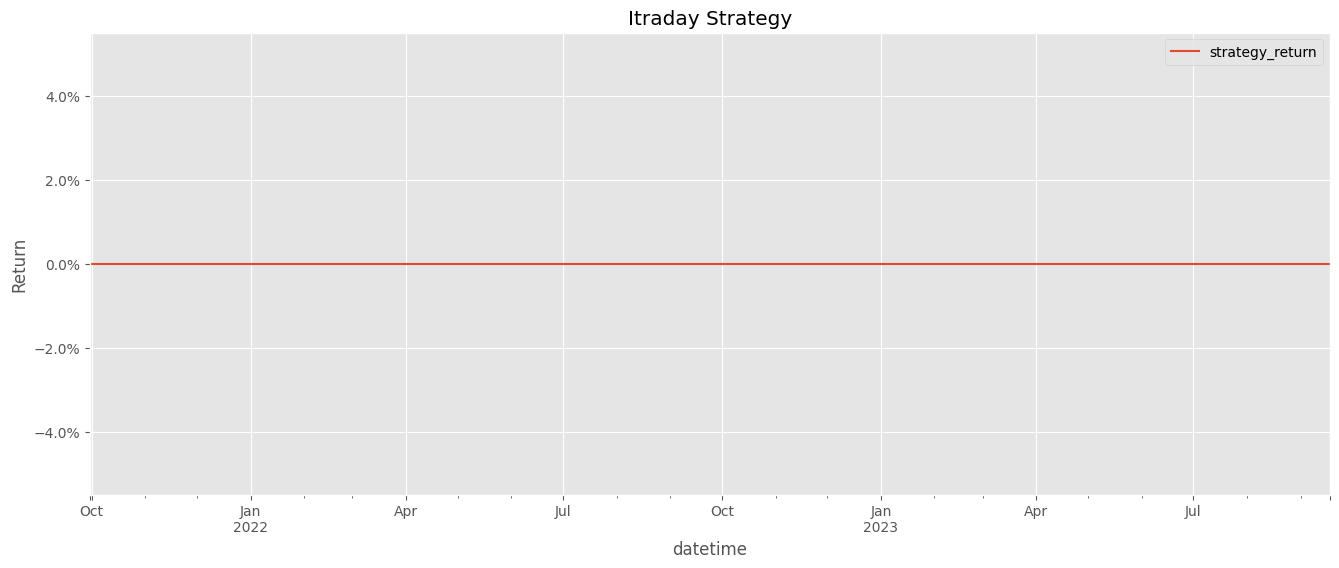

In [470]:
strategy_cumulative_returns = np.exp(np.log1p(daily_return_df).cumsum()).sub(1)

strategy_cumulative_returns.plot(figsize=(16,6))

plt.title('Itraday Strategy')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('Return')

plt.show()